# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
#Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
#Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#Library to split data
from sklearn.model_selection import train_test_split

#To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,  
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [3]:
#import csv into dataframe
hotel = pd.read_csv("INNHotelsGroup.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
df = hotel.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
#Show first five rows of data
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [6]:
#Last 5 rows of the dataset

df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [7]:
df.shape

(36275, 19)

In [8]:
#show a random sample of five rows of data
df.sample(n=5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
9231    INN09232             2               0                     2   
20113   INN20114             2               0                     0   
23076   INN23077             2               0                     1   
14762   INN14763             3               0                     1   
28058   INN28059             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
9231                   2      Not Selected                           0   
20113                  2       Meal Plan 1                           0   
23076                  3       Meal Plan 1                           0   
14762                  2       Meal Plan 2                           0   
28058                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
9231         Room_Type 1        208          2018              7   
20113        Room_Type 1         48          2018             11   
23076        Room_Type 4        120          2018              8   
14762        Room_Type 4         59          2018              4   
28058        Room_Type 1        151          2018              1   

       arrival_date market_segment_type  repeated_guest  \
9231             30              Online               0   
20113             4              Online               0   
23076             8              Online               0   
14762            22              Online               0   
28058            19             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
9231                              0                                     0   
20113                             0                                     0   
23076                             0                                     0   
14762                             0                                     0   
28058                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
9231             80.75000                       0       Canceled  
20113            97.20000                       2   Not_Canceled  
23076           127.80000                       0       Canceled  
14762           189.00000                       3   Not_Canceled  
28058            71.00000                       0   Not_Canceled

#### Observations

The dataframe has 36275 rows and 19 columns.

#### Observations

* Booking_ID values should also not provide any material information for model building.
* There are 5 columns of the dtype object, 1 columns of the dtype float64, and 13 columns of the dtype int64.
* The target variable for both the Logistic Regression model and the Decision Tree model will be booking_status.
* room_type_reserved values are ciphered (encoded) by INN Hotels and will not be useful for model building.

* All columns with object dtype object should be converted to category, which will reduce the space required to store the DataFrame and help with analysis later on.g.


In [9]:
# drop the 'Booking ID' columns from the data set. 
df = df.drop('Booking_ID', axis=1)

In [10]:
# view what are the values in object data types
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in cat_columns:
    print(df[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


* 36275 entries (rows) of 19 data points (columns) with no missing or duplicated data, leading me to believe that this is a well managed data set.
* 5 columns are object data sets, however one is the Booking_ID (which I already discarded). 3 will need to be 'OneHotEncoded'(type_of_meal_plan, room_type_observed, and market_segement_type). The last is 'booking_status' which is the testing result and is boolean (only two options), however not True/ False in type so will have to deal with that.

In [11]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10528               0.81072            2.20430   
std         0.51871         0.40265               0.87064            1.41090   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000        10.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.42354   
std                                 1.75417            35.08942   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           540.00000   

       no_of_special_requests  
count             36275.00000  
mean                  0.61966  
std                   0.78624  
min                   0.00000  
25%                   0.00000  
50%                   0.00000  
75%                   1.00000  
max                   5.00000

In [12]:
df.describe(include = ['object'])

type_of_meal_plan room_type_reserved market_segment_type booking_status
count              36275              36275               36275          36275
unique                 4                  7                   5              2
top          Meal Plan 1        Room_Type 1              Online   Not_Canceled
freq               27835              28130               23214          24390

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [13]:
# function to create labeled barplots

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

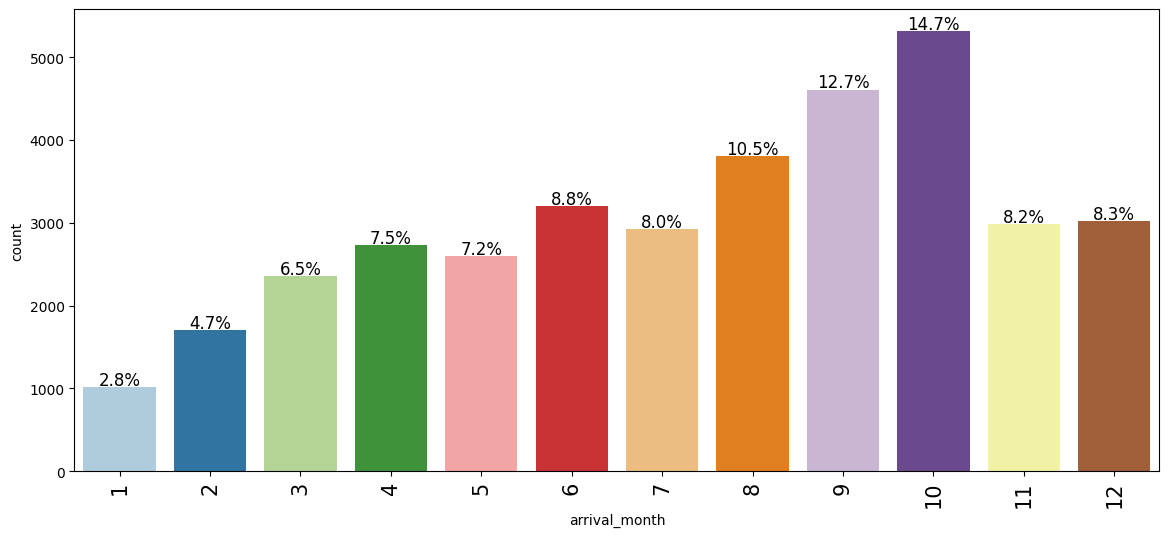

In [16]:
labeled_barplot(df, 'arrival_month', perc=True, n=None)

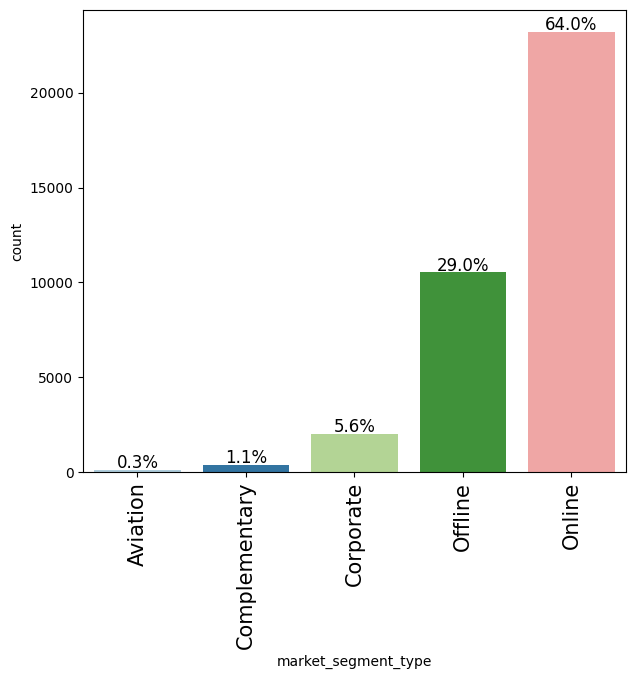

In [18]:
labeled_barplot(df, 'market_segment_type', perc=True, n=None)

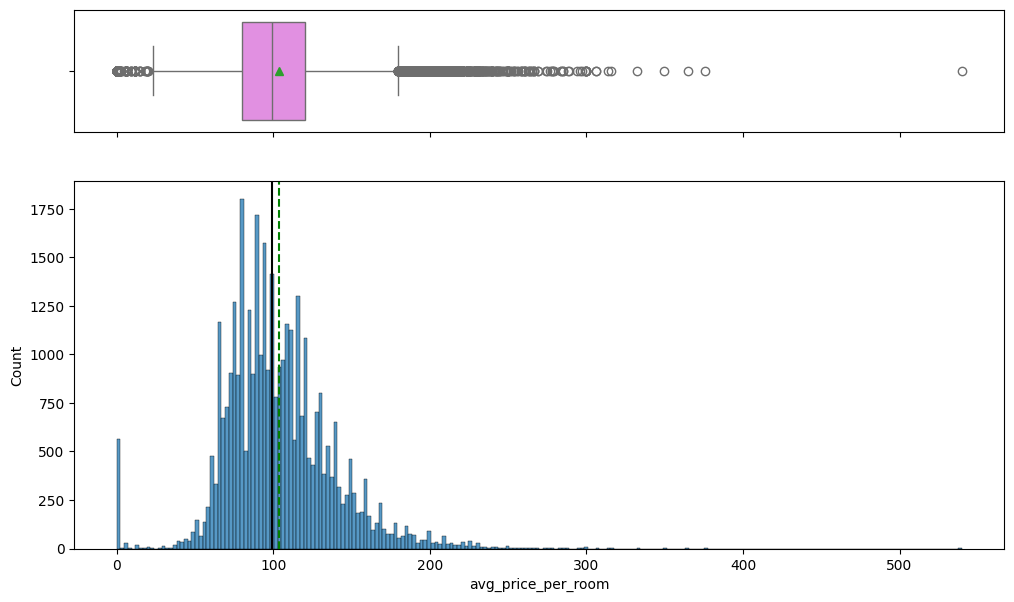

In [19]:
histogram_boxplot(df, 'avg_price_per_room')

In [22]:
# how many free rooms does the hotel give away?
df[df['avg_price_per_room']==0] 

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

In [24]:
df.loc[df['avg_price_per_room']==0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

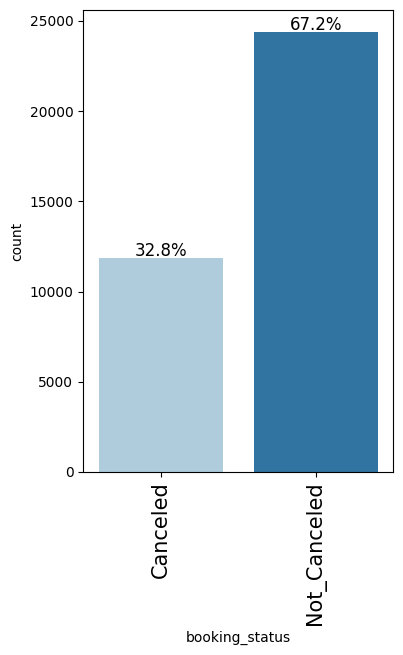

In [28]:
labeled_barplot(df, 'booking_status', perc=True, n=None)

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

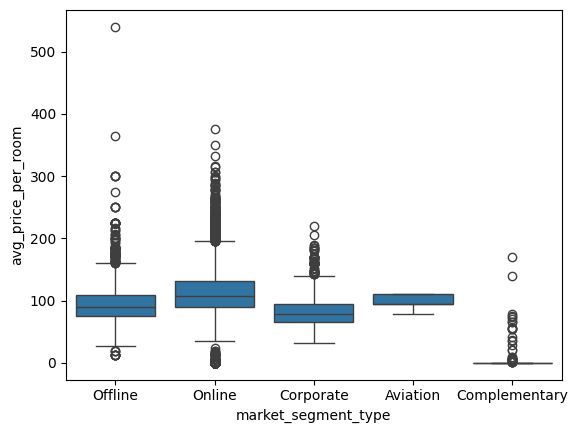

In [34]:
sns.boxplot(data=df, y='avg_price_per_room' , x='market_segment_type')

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


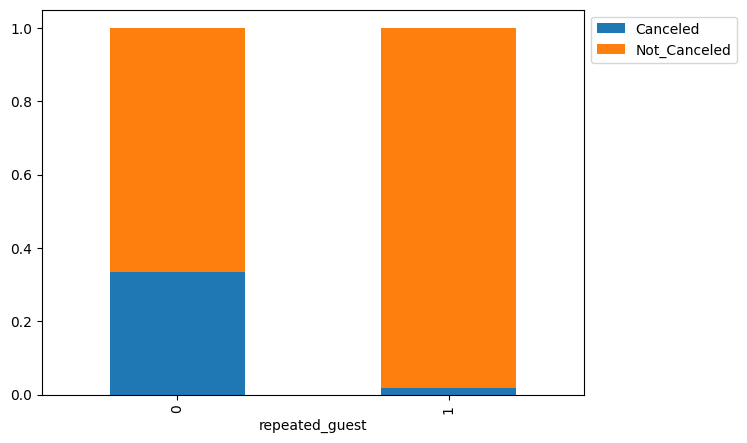

In [30]:
stacked_barplot(df,'repeated_guest','booking_status')

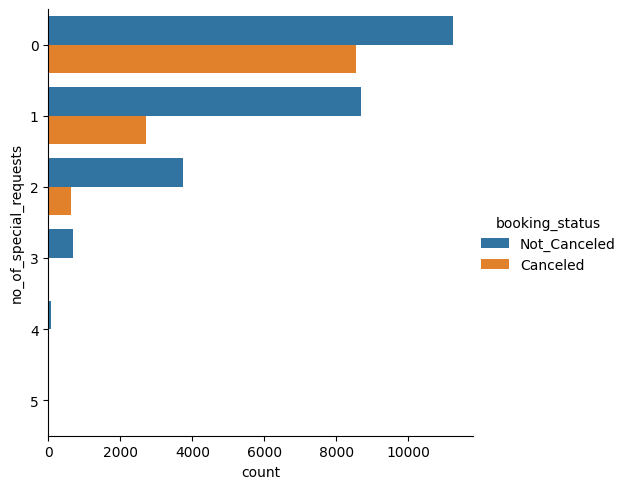

In [33]:
sns.catplot(data=df, y='no_of_special_requests', hue='booking_status', kind='count' )

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#### What are the busiest months in the hotel?


In [35]:
#group by *arrival month*, count number of records per month, sort from most to fewest bookings, and show top 4 months
df.groupby('arrival_month').count().sort_values(by='booking_status', ascending=False)['booking_status'].head(4)

arrival_month
10    5317
9     4611
8     3813
6     3203
Name: booking_status, dtype: int64

#### The busiest 4 months are:

1. October
2. September
3. August
4. June

* The month of October is the busiest month for the hotel, followed by September, August and June.

#### Which market segment do most of the guests come from?


In [36]:
df.groupby('market_segment_type').count().sort_values(by='booking_status', ascending=False)['booking_status']

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: booking_status, dtype: int64

* There are 23214 or (64%) of the 36275 total bookings are made online.


#### What are the differences in room prices in different market segments?


In [37]:
df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False)

avg_price_per_room
market_segment_type                    
Online                        112.25685
Aviation                      100.70400
Offline                        91.63268
Corporate                      82.91174
Complementary                   3.14176

* Online bookings yield the highest average price per room ($112.26), followed by bookings through Aviation and Offline market segments.


#### What percentage of bookings are canceled?


In [38]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

* 11885 (33%) of the total 36275 bookings were cancelled.


#### What percentage of repeating guests cancel?


In [39]:
df.groupby('repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
0               Not_Canceled      23476
                Canceled          11869
1               Not_Canceled        914
                Canceled             16
Name: booking_status, dtype: int64

* When looking at repeating customers, there were 16 out of the 930 bookings made by repeated guests were cancelled. Only 2% of the 930 total bookings made by repeated guests were cancelled.


#### Do special requirements affect booking cancellation?


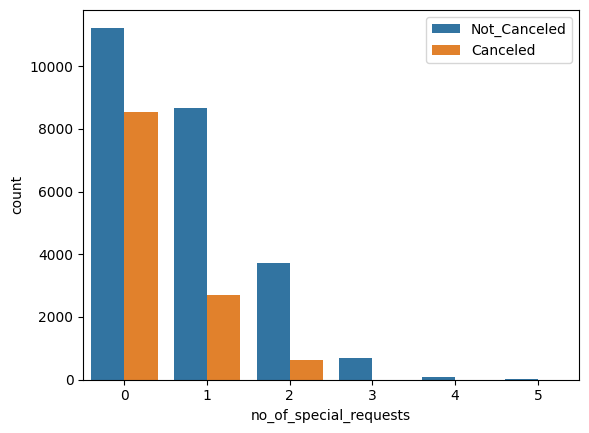

In [40]:
sns.countplot(data=df, hue='booking_status', x='no_of_special_requests')
plt.legend(loc='upper right')
plt.show()

* As the number of special requests made by customers increase, the proportion of bookings cancelled decreases.


### Univariate

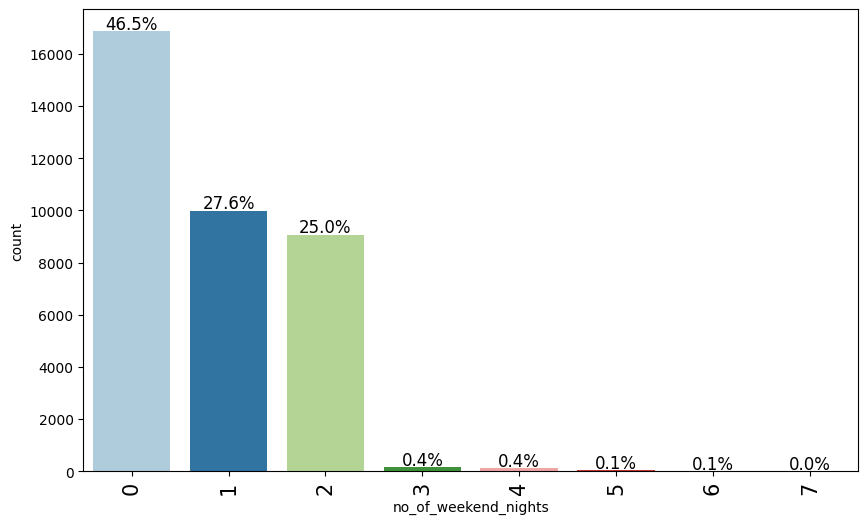

In [42]:
labeled_barplot(df, 'no_of_weekend_nights', perc=True)

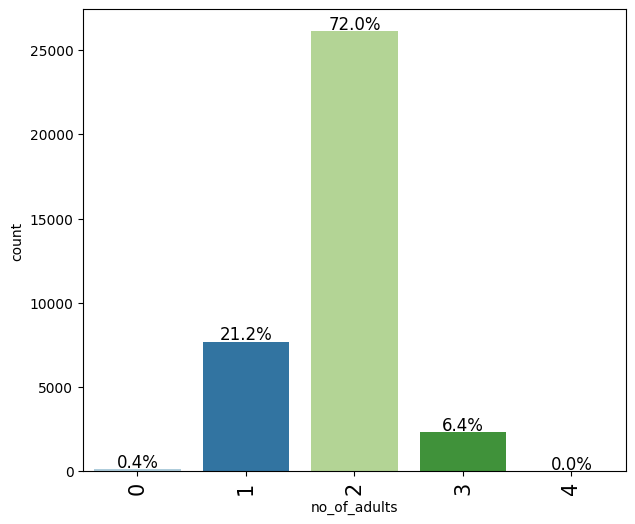

In [44]:
labeled_barplot(df, 'no_of_adults', perc=True)

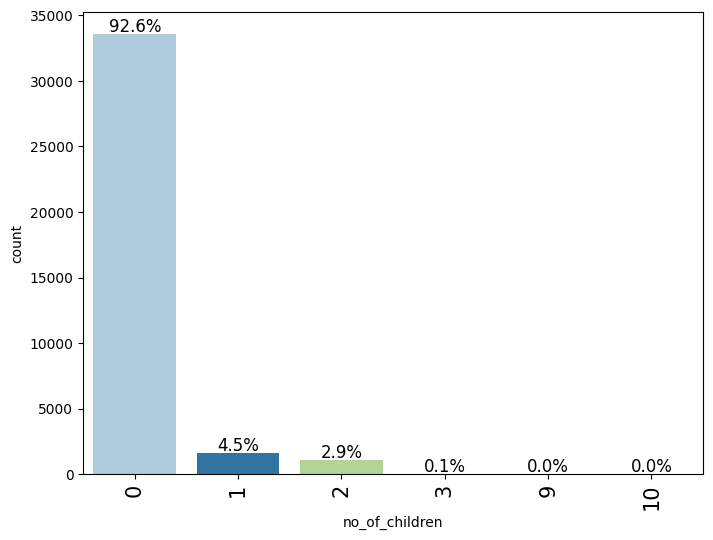

In [46]:
labeled_barplot(df, 'no_of_children', perc=True)

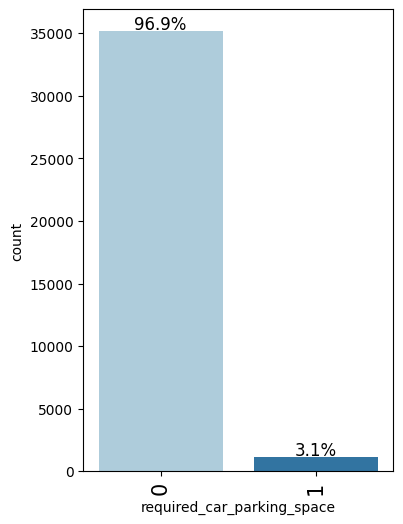

In [49]:
labeled_barplot(df, 'required_car_parking_space', perc=True)

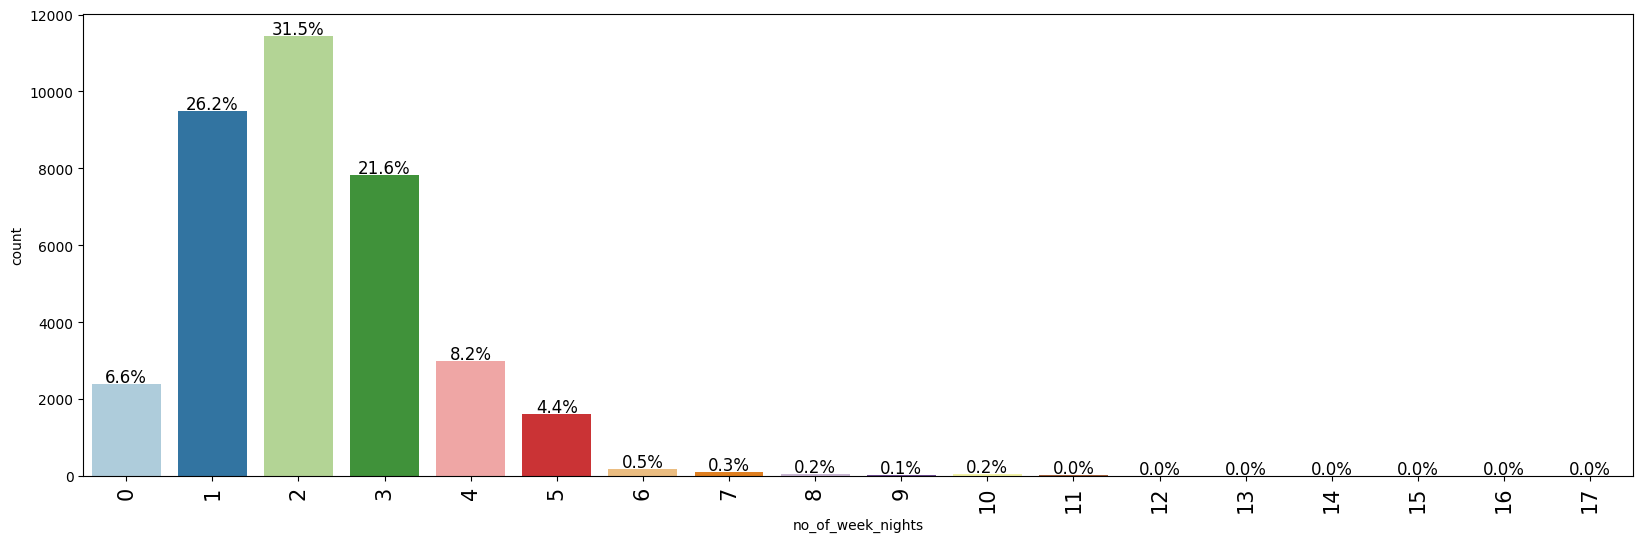

In [47]:
labeled_barplot(df, 'no_of_week_nights', perc=True)

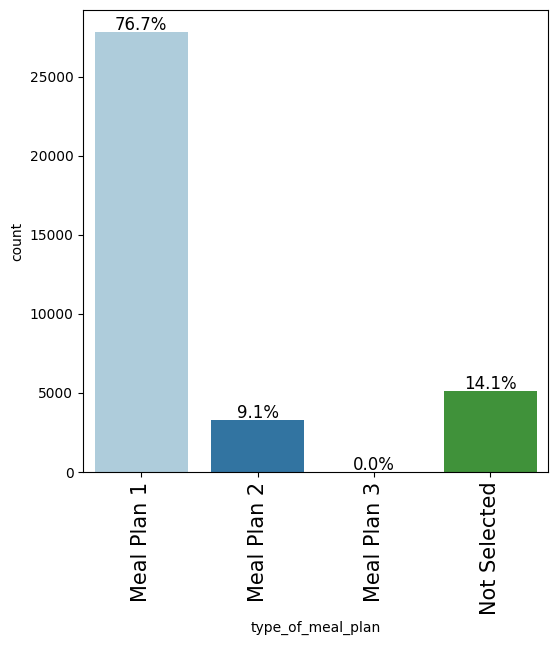

In [53]:
labeled_barplot(df, 'type_of_meal_plan', perc=True)

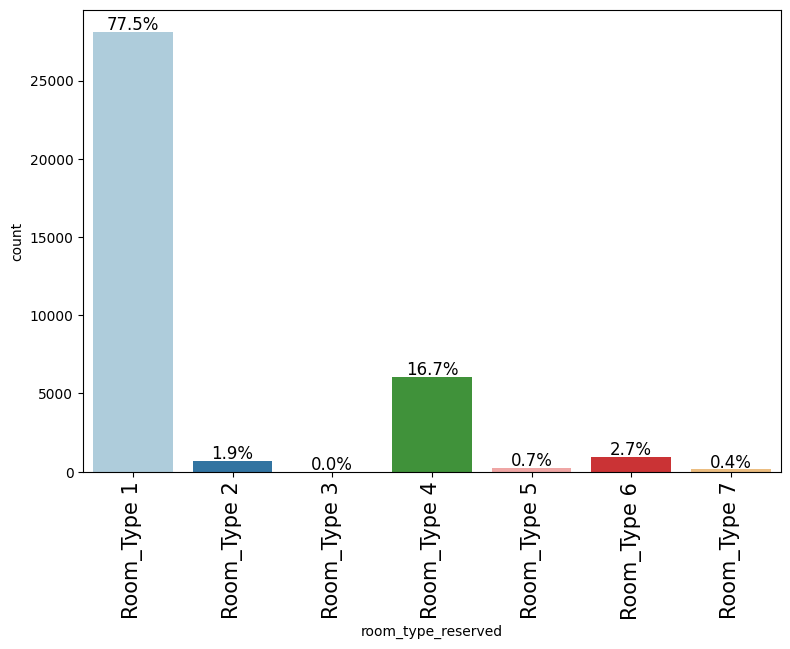

In [52]:
labeled_barplot(df, 'room_type_reserved', perc=True)

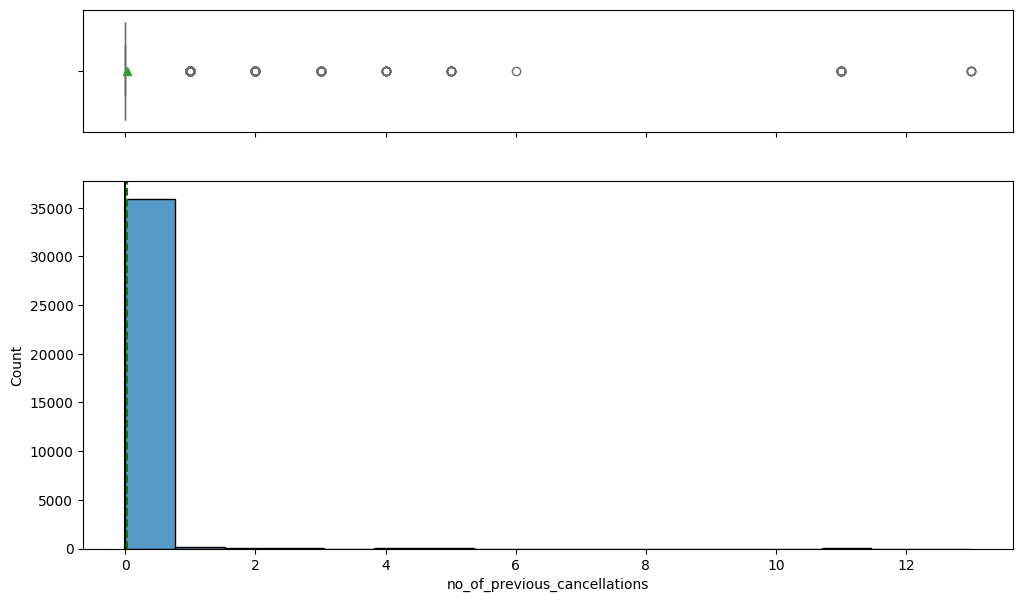

In [55]:
histogram_boxplot(df, 'no_of_previous_cancellations')

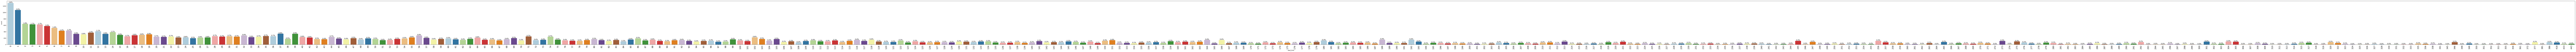

In [56]:
labeled_barplot(df, 'lead_time', perc=True)

<Axes: >

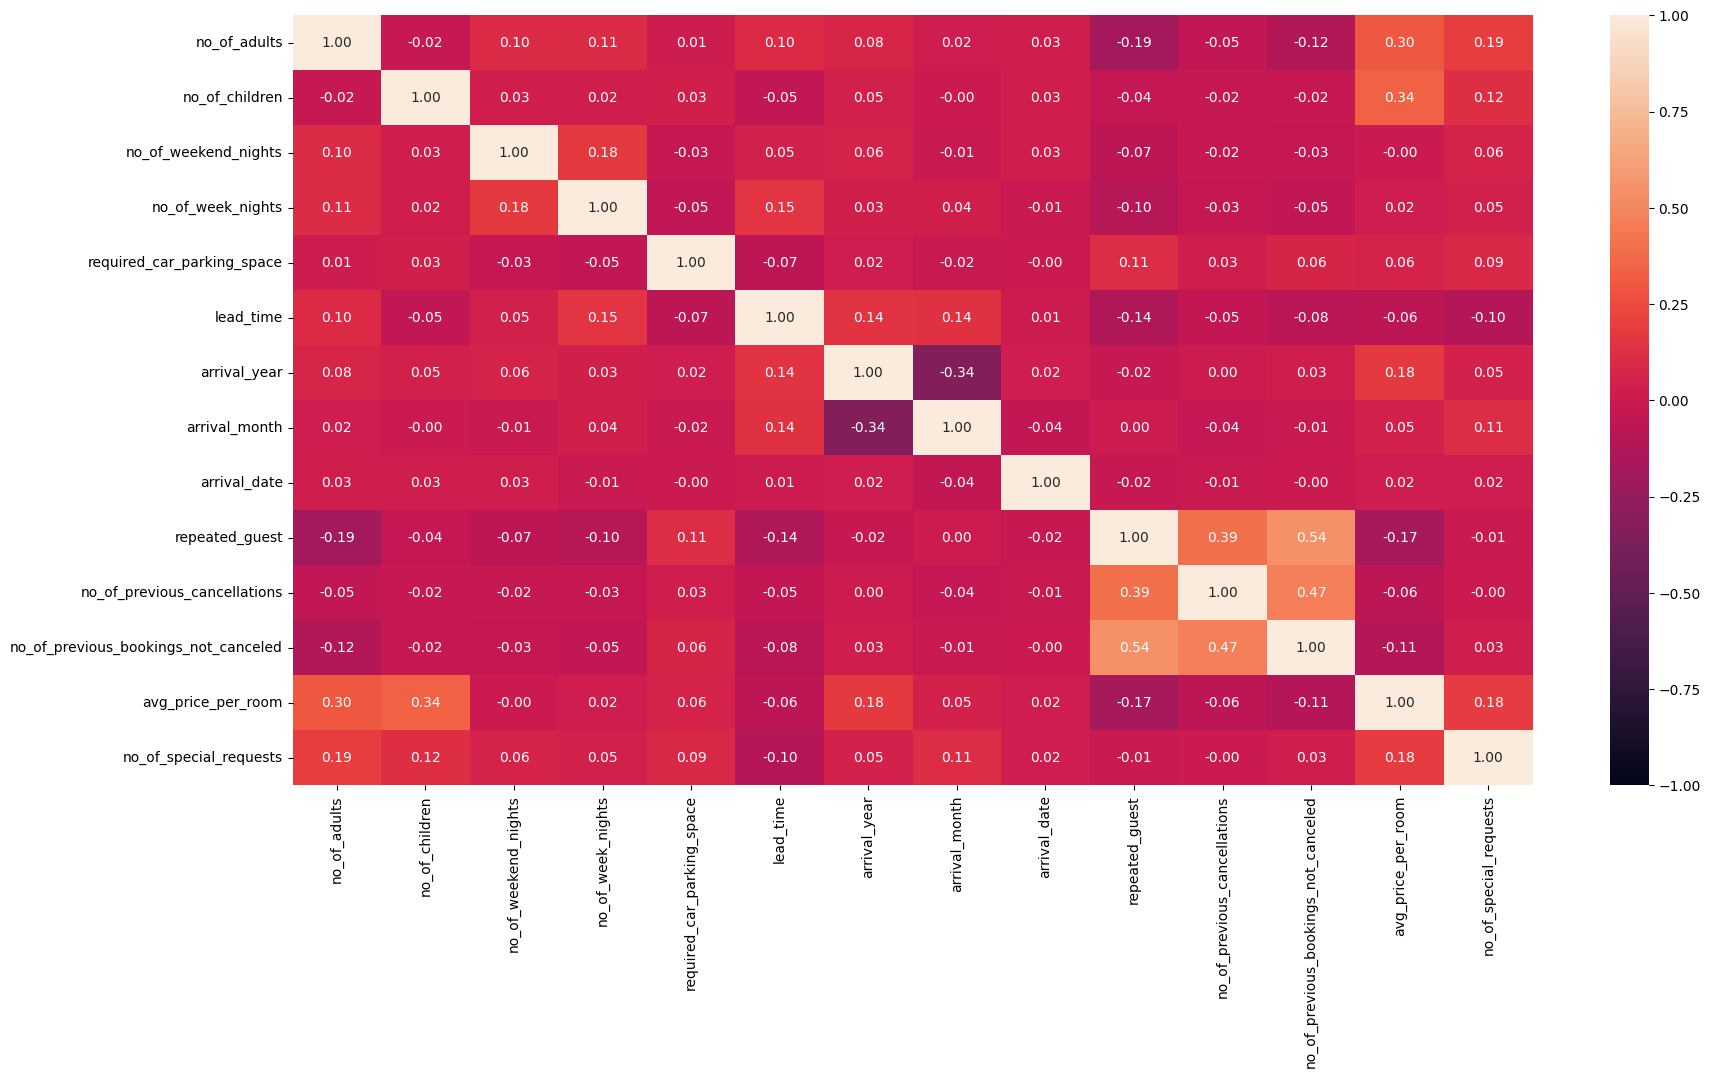

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(
df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

In [64]:
# New column for lenght of stay
df['length_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

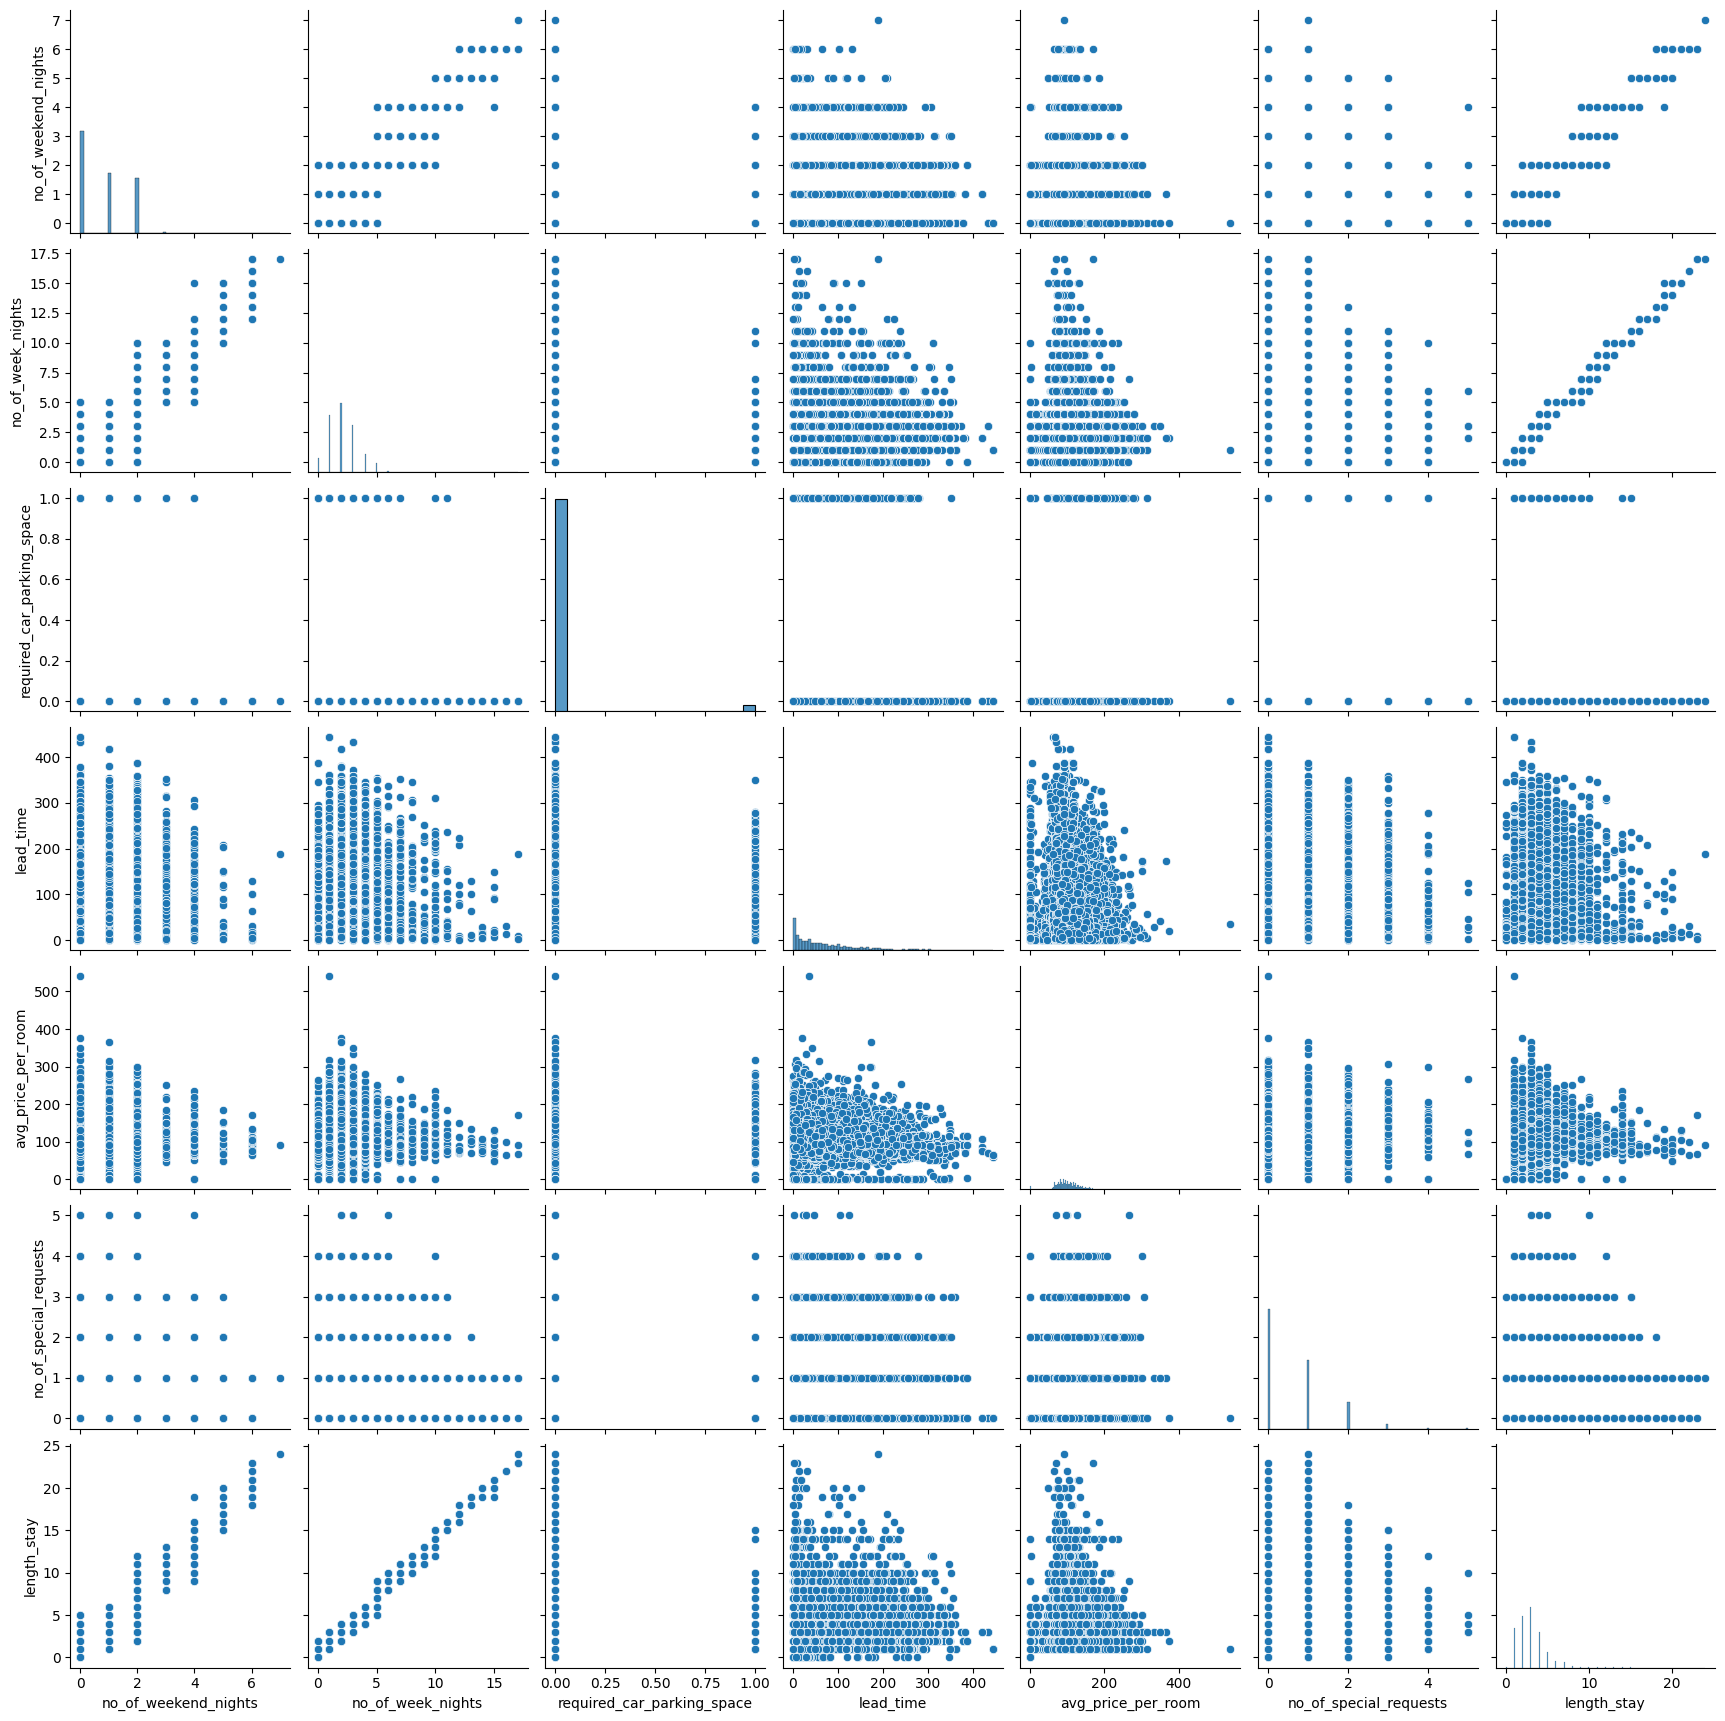

In [65]:
sns.pairplot(df[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status','length_stay']]);

# Data Preprocessing

In [66]:
df.loc[df['booking_status']=='Not_Canceled','booking_status'] = False
df.loc[df['booking_status']=='Canceled','booking_status'] = True

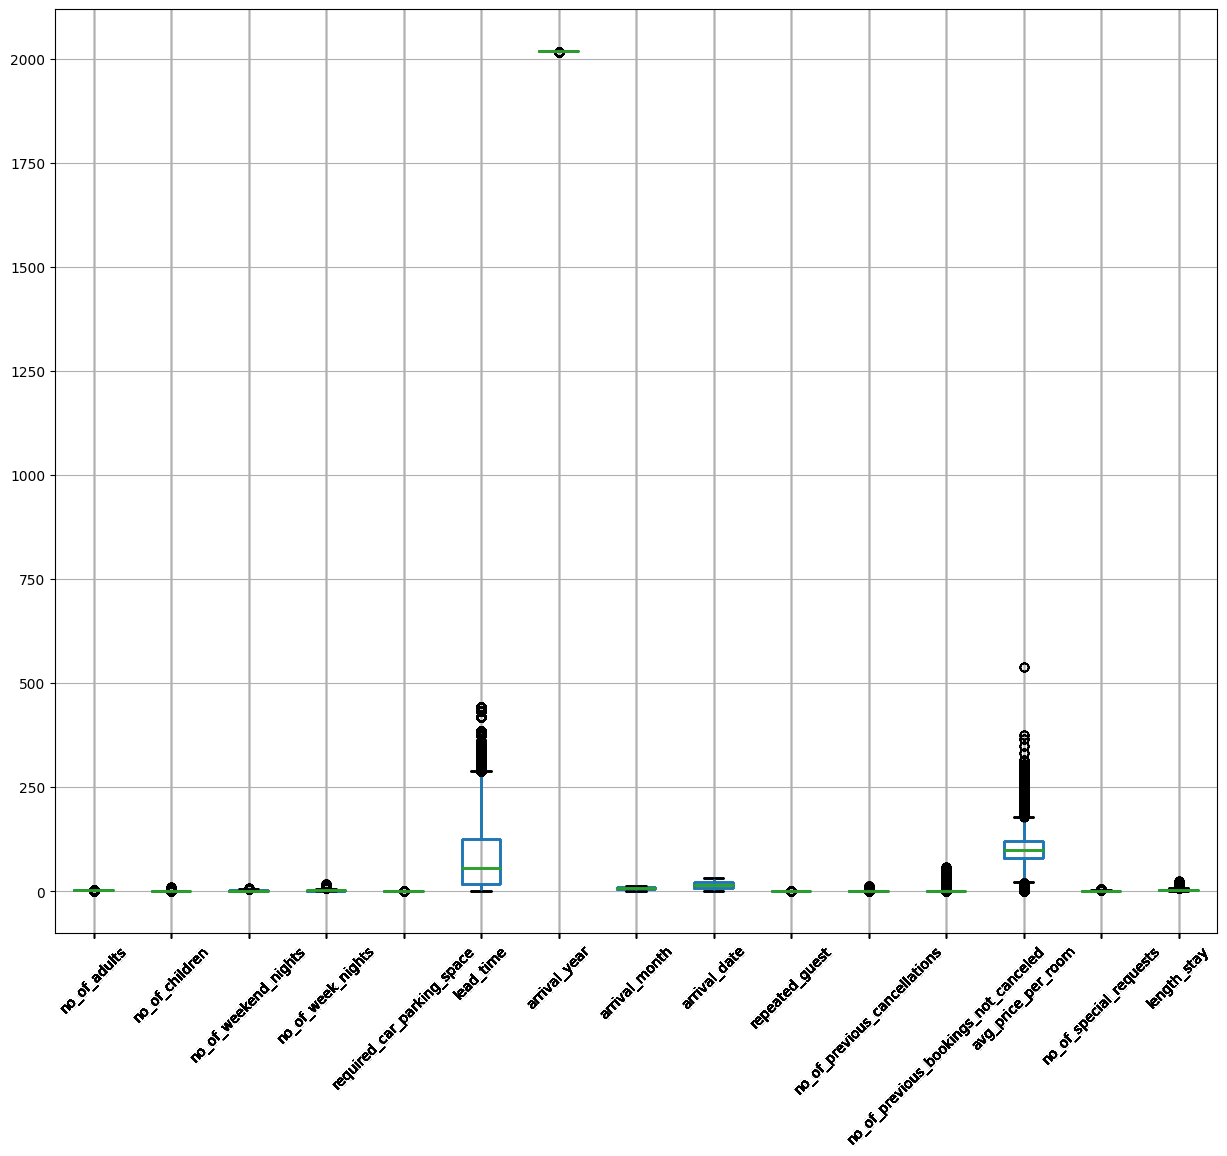

In [68]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# drop column because they were either time, or not helpful
numeric_columns.remove("arrival_year")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    df.boxplot() 

plt.xticks(rotation=45)
plt.show()

There are two heavy outlier columns, lead_time & avg_room_price. I will only treat avg_room_price as a log because I am going to bin lead time and that should handle those outliers.

In [72]:
#Solving the IQR fro avg price room
quartiles = np.quantile(df['avg_price_per_room'][df['avg_price_per_room'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['avg_price_per_room'] - df['avg_price_per_room'].median()) > power_4iqr, 'avg_price_per_room']
outlier_powers.shape

Q1 = 80.3, Q3 = 120.0, 4*IQR = 158.8


(49,)

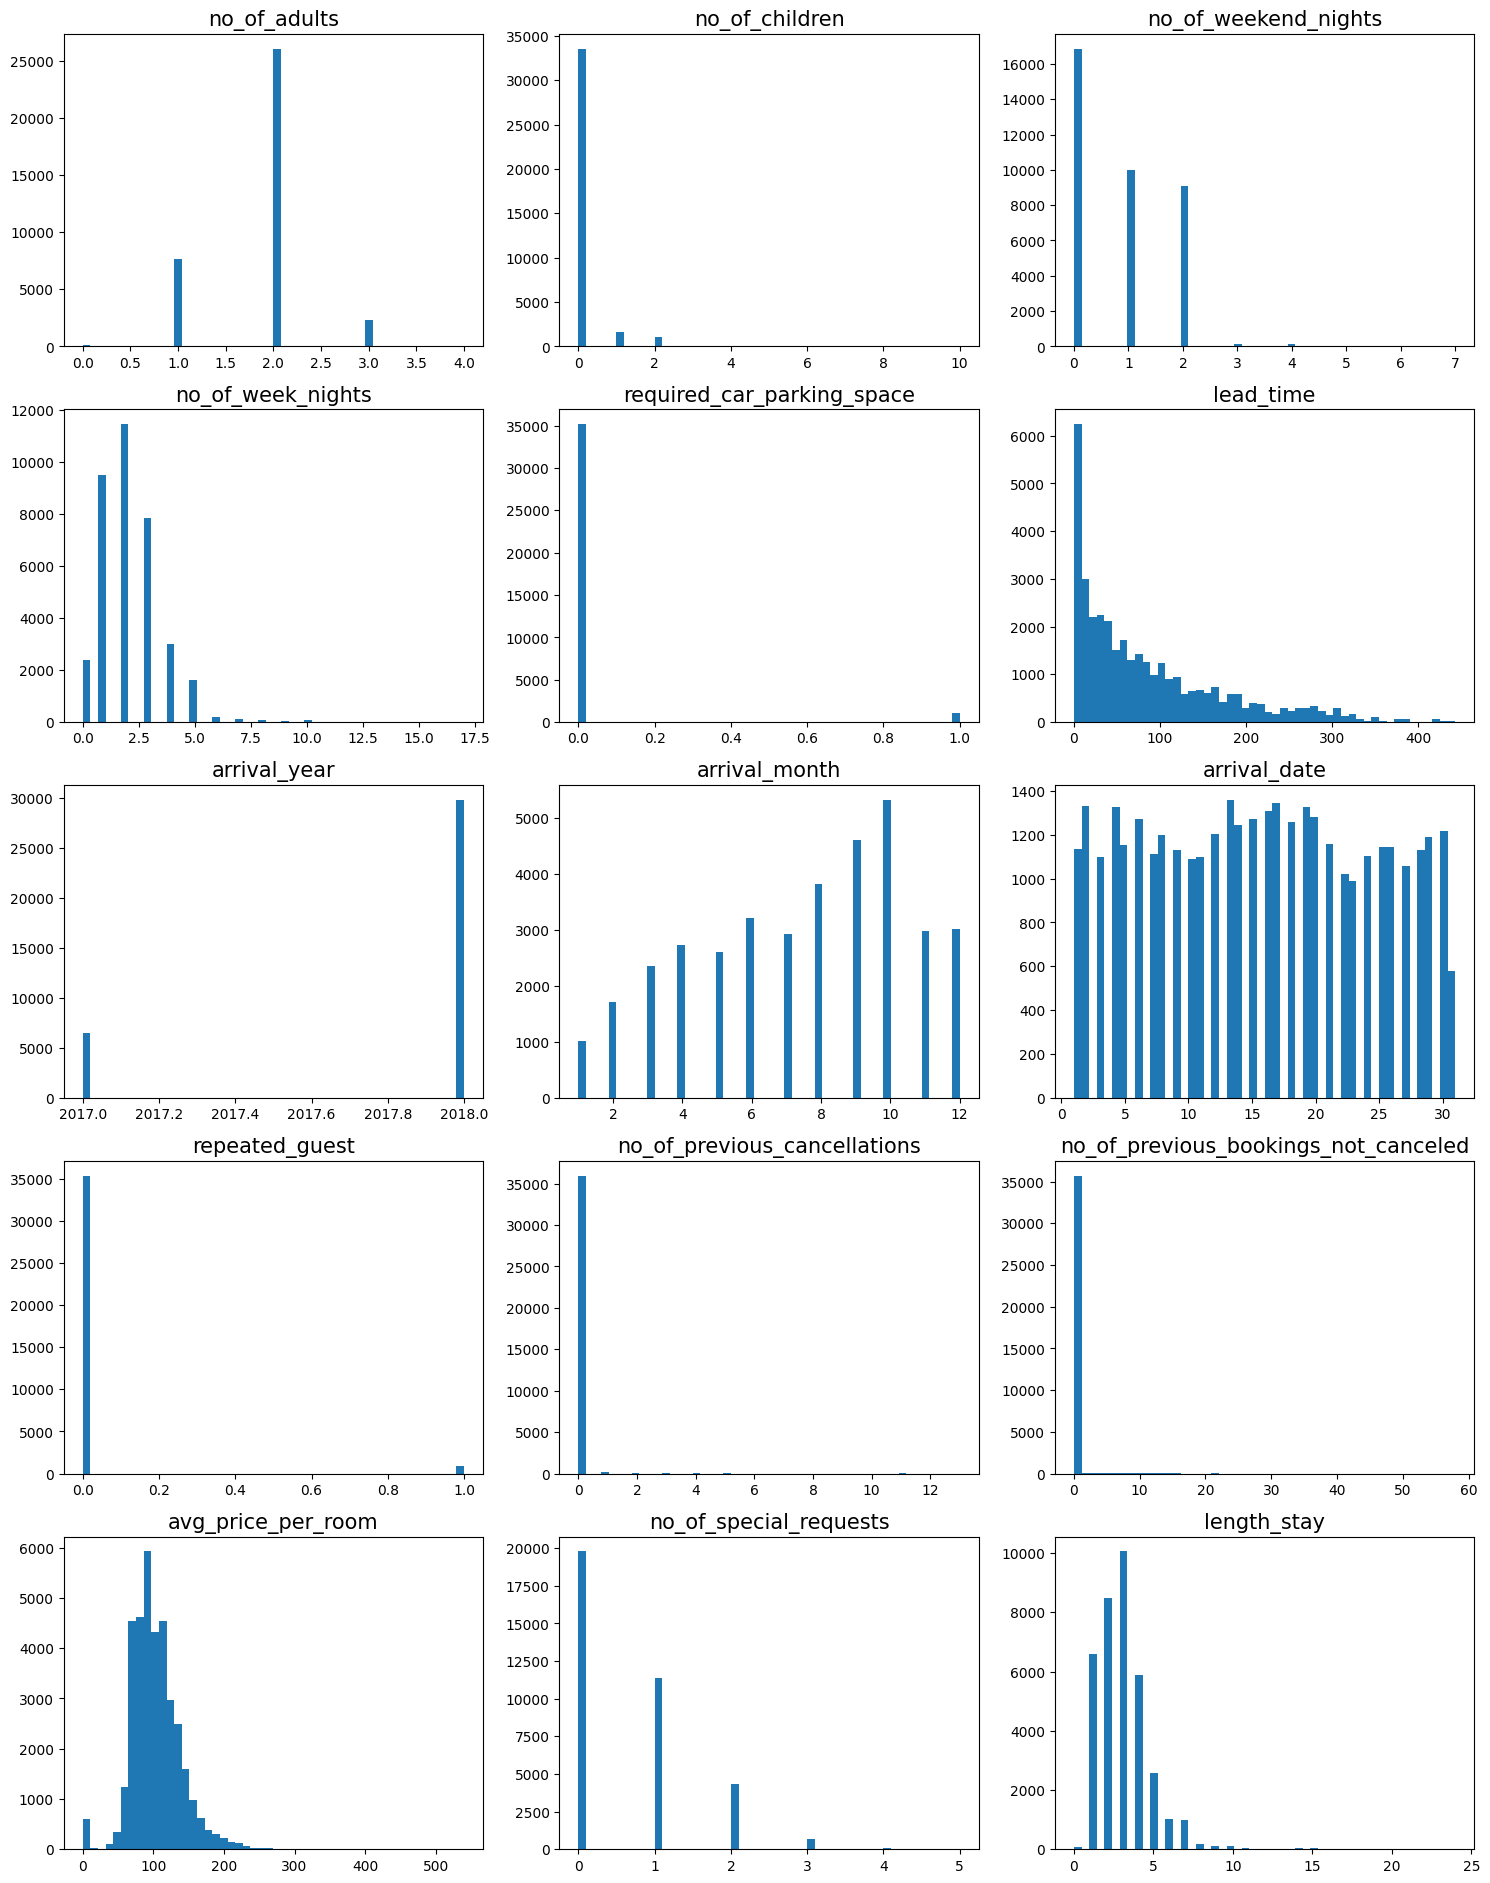

In [81]:
# creating a list of columns
dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns 
]

plt.figure(figsize=(15, 45))
#looping the list and ploting histograms
for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=15)

plt.show()

In [82]:
df2 = df.copy()
# removing because they are close to normal
dist_cols.remove('no_of_week_nights')
dist_cols.remove('no_of_adults')
dist_cols.remove('length_stay')
dist_cols.remove('avg_price_per_room')
# removing becasue they are boolean or time related. 
dist_cols.remove('arrival_year')
dist_cols.remove('required_car_parking_space')
dist_cols.remove('arrival_date')
dist_cols.remove('arrival_month')
dist_cols.remove('repeated_guest')
# removing becasue I have a different treatment in mind
dist_cols.remove('lead_time')

In [83]:
# using log transforms on some columns
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

no_of_adults  no_of_week_nights type_of_meal_plan  \
0             2                  2       Meal Plan 1   
1             2                  3      Not Selected   
2             1                  1       Meal Plan 1   
3             2                  2       Meal Plan 1   
4             2                  1      Not Selected   

   required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                           0        Room_Type 1        224          2017   
1                           0        Room_Type 1          5          2018   
2                           0        Room_Type 1          1          2018   
3                           0        Room_Type 1        211          2018   
4                           0        Room_Type 1         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0            65.00000          False            3             0.00000   
1           106.68000          False            5             0.00000   
2            60.00000           True            3             0.00000   
3           100.00000           True            2             0.00000   
4            94.50000           True            2             0.00000   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                   0.69315                           0.00000   
1                   1.09861                           0.00000   
2                   1.09861                           0.00000   
3                   0.00000                           0.00000   
4                   0.69315                           0.00000   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  
0                                   0.00000                     0.00000  
1                                   0.00000                     0.69315  
2                                   0.00000                     0.00000  
3                                   0.00000                     0.00000  
4                                   0.00000                     0.00000

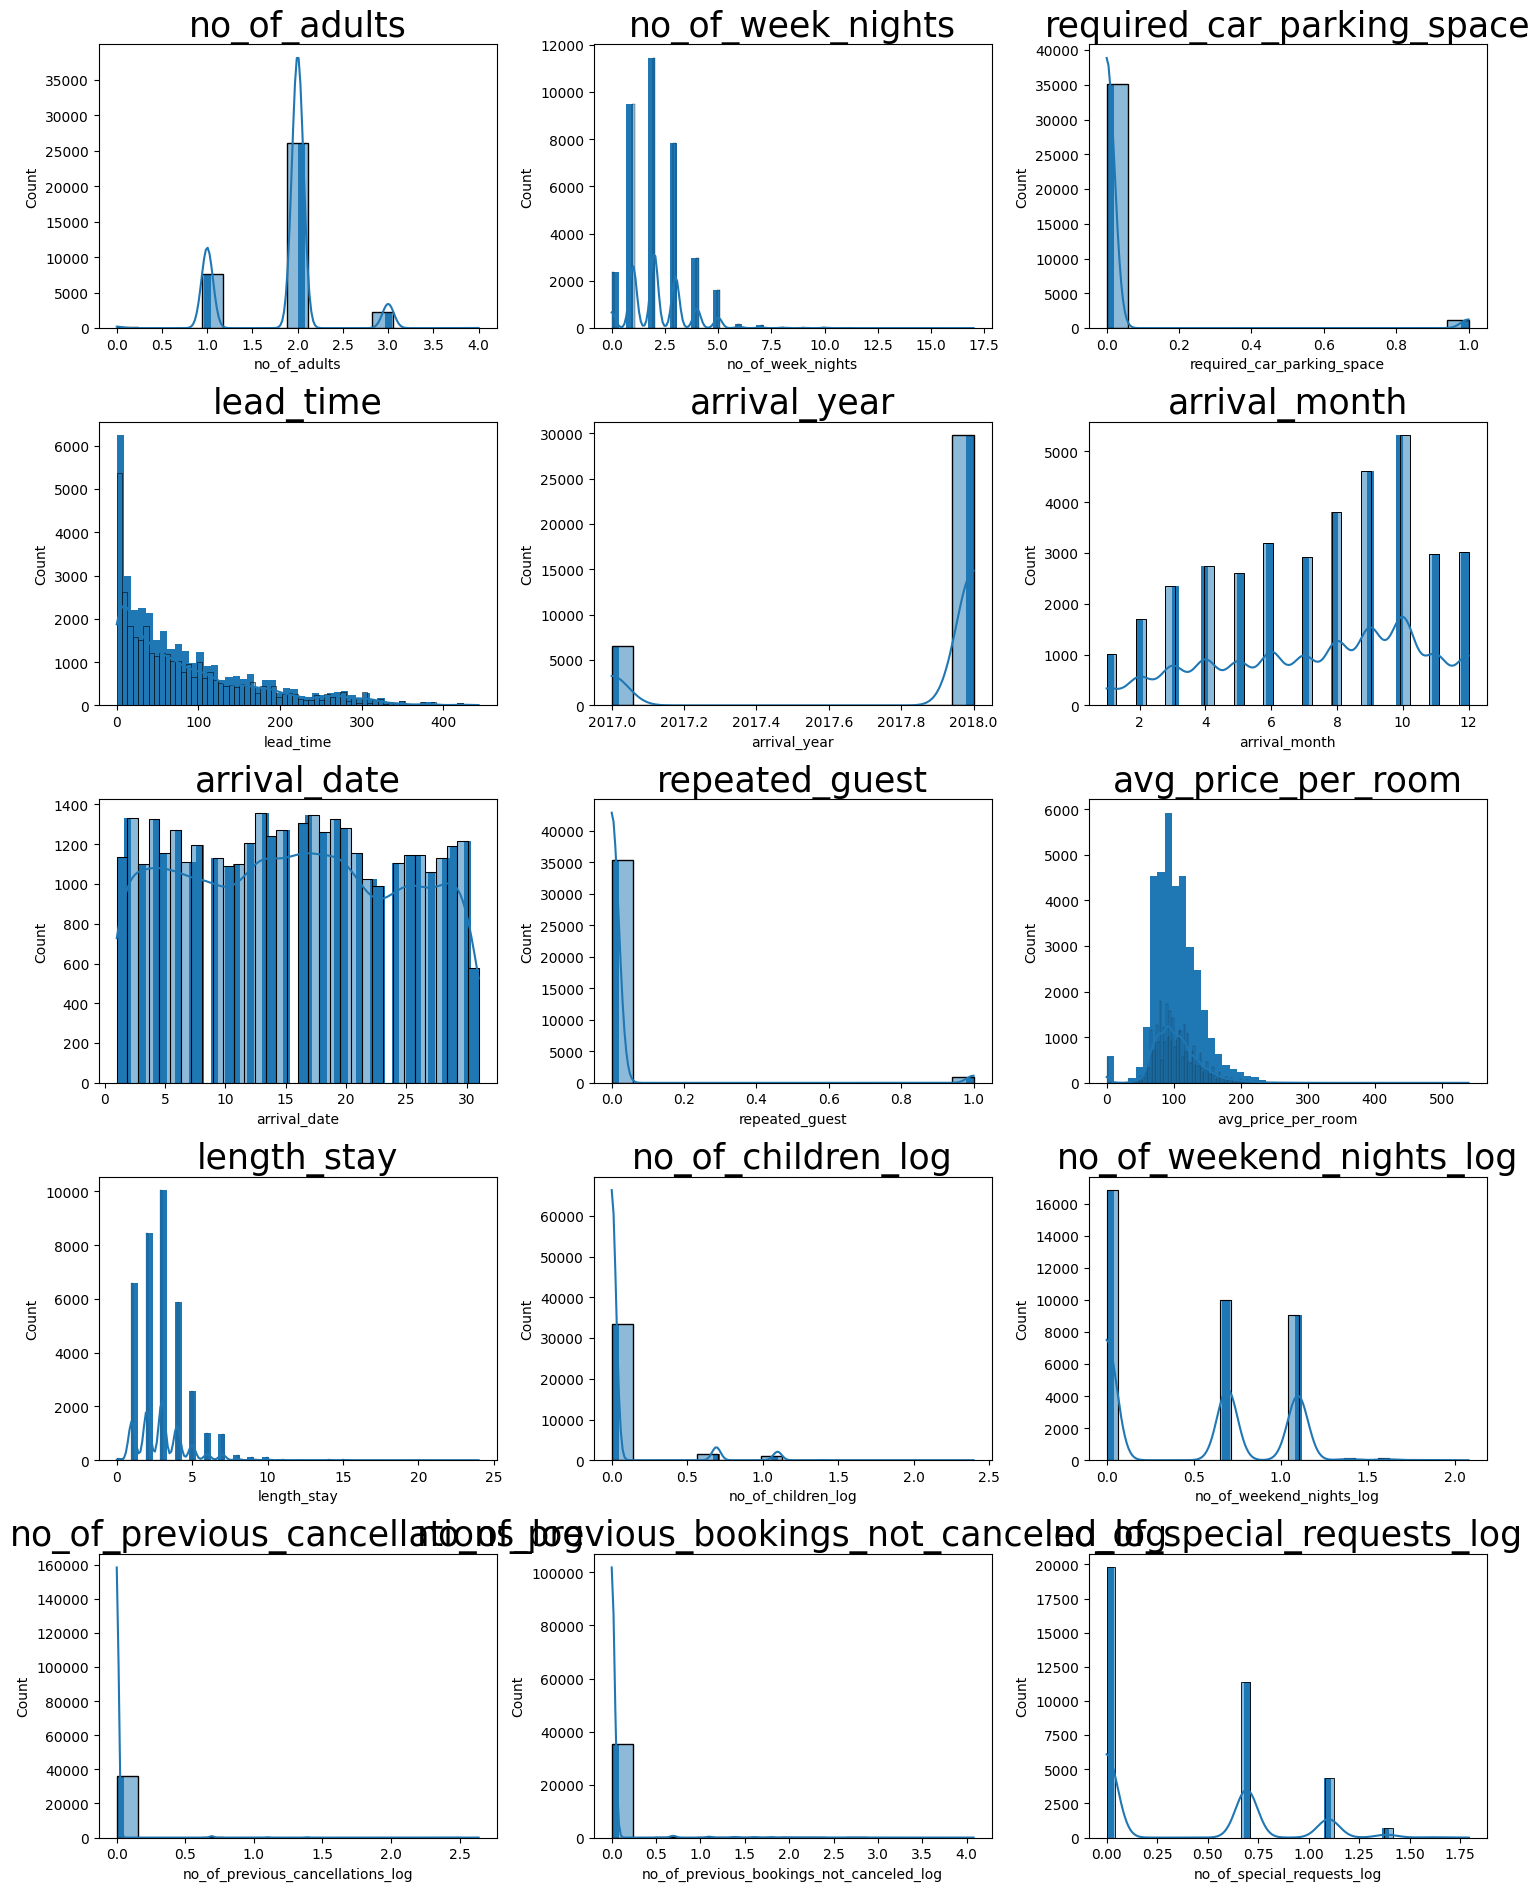

In [85]:
# viewing the distributions after the log transformation. 
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns 
]

#  plot histogram of all numeric columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    sns.histplot(data=df2, x=dist_cols[i], kde=True)  
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [86]:
dummy_data = pd.get_dummies (
    df2,
    columns = [
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ],
    drop_first=True,
)
dummy_data.head()

no_of_adults  no_of_week_nights  required_car_parking_space  lead_time  \
0             2                  2                           0        224   
1             2                  3                           0          5   
2             1                  1                           0          1   
3             2                  2                           0        211   
4             2                  1                           0         48   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0          2017             10             2               0   
1          2018             11             6               0   
2          2018              2            28               0   
3          2018              5            20               0   
4          2018              4            11               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0            65.00000          False            3             0.00000   
1           106.68000          False            5             0.00000   
2            60.00000           True            3             0.00000   
3           100.00000           True            2             0.00000   
4            94.50000           True            2             0.00000   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                   0.69315                           0.00000   
1                   1.09861                           0.00000   
2                   1.09861                           0.00000   
3                   0.00000                           0.00000   
4                   0.69315                           0.00000   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  \
0                                   0.00000                     0.00000   
1                                   0.00000                     0.69315   
2                                   0.00000                     0.00000   
3                                   0.00000                     0.00000   
4                                   0.00000                     0.00000   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2         

In [87]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  int64  
 1   no_of_week_nights                         36275 non-null  int64  
 2   required_car_parking_space                36275 non-null  int64  
 3   lead_time                                 36275 non-null  int64  
 4   arrival_year                              36275 non-null  int64  
 5   arrival_month                             36275 non-null  int64  
 6   arrival_date                              36275 non-null  int64  
 7   repeated_guest                            36275 non-null  int64  
 8   avg_price_per_room                        36275 non-null  float64
 9   booking_status                            36275 non-null  object 
 10  length_stay                       

In [88]:
dummied_cut = pd.cut(dummy_data['lead_time'], 5, labels=['lat_min','short','med','long','advanced'])
dummied_cut.head(10)

0        med
1    lat_min
2    lat_min
3        med
4    lat_min
5       long
6    lat_min
7    lat_min
8      short
9    lat_min
Name: lead_time, dtype: category
Categories (5, object): ['lat_min' < 'short' < 'med' < 'long' < 'advanced']

In [89]:
df3 = pd.merge(dummy_data, dummied_cut, left_index=True, right_index=True)

df3.head().T

0         1        2  \
no_of_adults                                    2         2        1   
no_of_week_nights                               2         3        1   
required_car_parking_space                      0         0        0   
lead_time_x                                   224         5        1   
arrival_year                                 2017      2018     2018   
arrival_month                                  10        11        2   
arrival_date                                    2         6       28   
repeated_guest                                  0         0        0   
avg_price_per_room                       65.00000 106.68000 60.00000   
booking_status                              False     False     True   
length_stay                                     3         5        3   
no_of_children_log                        0.00000   0.00000  0.00000   
no_of_weekend_nights_log                  0.69315   1.09861  1.09861   
no_of_previous_cancellations_log          0.00000   0.00000  0.00000   
no_of_previous_bookings_not_canceled_log  0.00000   0.00000  0.00000   
no_of_special_requests_log                0.00000   0.69315  0.00000   
type_of_meal_plan_Meal Plan 2                   0         0        0   
type_of_meal_plan_Meal Plan 3                   0         0        0   
type_of_meal_plan_Not Selected                  0         1        0   
room_type_reserved_Room_Type 2                  0         0        0   
room_type_reserved_Room_Type 3                  0         0        0   
room_type_reserved_Room_Type 4                  0         0        0   
room_type_reserved_Room_Type 5                  0         0        0   
room_type_reserved_Room_Type 6                  0         0        0   
room_type_reserved_Room_Type 7                  0         0        0   
market_segment_type_Complementary               0         0        0   
market_segment_type_Corporate                   0         0        0   
market_segment_type_Offline                     1         0        0   
market_segment_type_Online                      0         1        1   
lead_time_y                                   med   lat_min  lat_min   

                                                 3        4  
no_of_adults                                     2        2  
no_of_week_nights                                2        1  
required_car_parking_space                       0        0  
lead_time_x                                    211       48  
arrival_year                                  2018     2018  
arrival_month                                    5        4  
arrival_date                                    20       11  
repeated_guest                                   0        0  
avg_price_per_room                       100.00000 94.50000  
booking_status                                True     True  
length_stay                                      2        2  
no_of_children_log                         0.00000  0.00000  
no_of_weekend_nights_log                   0.00000  0.69315  
no_of_previous_cancellations_log           0.00000  0.00000  
no_of_previous_bookings_not_canceled_log   0.00000  0.00000  
no_of_special_requests_log                 0.00000  0.00000  
type_of_meal_plan_Meal Plan 2                    0        0  
type_of_meal_plan_Meal Plan 3                    0        0  
type_of_meal_plan_Not Selected                   0        1  
room_type_reserved_Room_Type 2                   0        0  
room_type_reserved_Room_Type 3                   0        0  
room_type_reserved_Room_Type 4                   0        0  
room_type_reserved_Room_Type 5                   0        0  
room_type_reserved_Room_Type 6                   0        0  
room_type_reserved_Room_Type 7                   0        0  
market_segment_type_Complementary                0        0  
market_segment_type_Corporate                    0        0  
market_segment_type_Offline                      0        0  
market_segment_ty

In [90]:
# dropping time variables and lead_time_x since it has been binned into 5 columns.

df3_5 = df3.drop(['lead_time_x','arrival_date', 'arrival_year'], axis=1)

In [91]:
df4 = pd.get_dummies (
    df3_5,
    columns = [
        'lead_time_y',  
    ],
    drop_first=True,
)
df4.head().T

0         1        2  \
no_of_adults                                    2         2        1   
no_of_week_nights                               2         3        1   
required_car_parking_space                      0         0        0   
arrival_month                                  10        11        2   
repeated_guest                                  0         0        0   
avg_price_per_room                       65.00000 106.68000 60.00000   
booking_status                              False     False     True   
length_stay                                     3         5        3   
no_of_children_log                        0.00000   0.00000  0.00000   
no_of_weekend_nights_log                  0.69315   1.09861  1.09861   
no_of_previous_cancellations_log          0.00000   0.00000  0.00000   
no_of_previous_bookings_not_canceled_log  0.00000   0.00000  0.00000   
no_of_special_requests_log                0.00000   0.69315  0.00000   
type_of_meal_plan_Meal Plan 2                   0         0        0   
type_of_meal_plan_Meal Plan 3                   0         0        0   
type_of_meal_plan_Not Selected                  0         1        0   
room_type_reserved_Room_Type 2                  0         0        0   
room_type_reserved_Room_Type 3                  0         0        0   
room_type_reserved_Room_Type 4                  0         0        0   
room_type_reserved_Room_Type 5                  0         0        0   
room_type_reserved_Room_Type 6                  0         0        0   
room_type_reserved_Room_Type 7                  0         0        0   
market_segment_type_Complementary               0         0        0   
market_segment_type_Corporate                   0         0        0   
market_segment_type_Offline                     1         0        0   
market_segment_type_Online                      0         1        1   
lead_time_y_short                               0         0        0   
lead_time_y_med                                 1         0        0   
lead_time_y_long                                0         0        0   
lead_time_y_advanced                            0         0        0   

                                                 3        4  
no_of_adults                                     2        2  
no_of_week_nights                                2        1  
required_car_parking_space                       0        0  
arrival_month                                    5        4  
repeated_guest                                   0        0  
avg_price_per_room                       100.00000 94.50000  
booking_status                                True     True  
length_stay                                      2        2  
no_of_children_log                         0.00000  0.00000  
no_of_weekend_nights_log                   0.00000  0.69315  
no_of_previous_cancellations_log           0.00000  0.00000  
no_of_previous_bookings_not_canceled_log   0.00000  0.00000  
no_of_special_requests_log                 0.00000  0.00000  
type_of_meal_plan_Meal Plan 2                    0        0  
type_of_meal_plan_Meal Plan 3                    0        0  
type_of_meal_plan_Not Selected                   0        1  
room_type_reserved_Room_Type 2                   0        0  
room_type_reserved_Room_Type 3                   0        0  
room_type_reserved_Room_Type 4                   0        0  
room_type_reserved_Room_Type 5                   0        0  
room_type_reserved_Room_Type 6                   0        0  
room_type_reserved_Room_Type 7                   0        0  
market_segment_type_Complementary                0        0  
market_segment_type_Corporate                    0        0  
market_segment_type_Offline                      0        0  
market_segment_type_Online                       1        1  
lead_time_y_short                                0        0  
lead_time_y_med                                  1        0  
lead_time_y_long 

In [93]:
df4 = df4.astype(float)

In [94]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  float64
 1   no_of_week_nights                         36275 non-null  float64
 2   required_car_parking_space                36275 non-null  float64
 3   arrival_month                             36275 non-null  float64
 4   repeated_guest                            36275 non-null  float64
 5   avg_price_per_room                        36275 non-null  float64
 6   booking_status                            36275 non-null  float64
 7   length_stay                               36275 non-null  float64
 8   no_of_children_log                        36275 non-null  float64
 9   no_of_weekend_nights_log                  36275 non-null  float64
 10  no_of_previous_cancellations_log  

In [95]:
# Using the SCIEM method I will split the train test data first.
X = df4.drop("booking_status" , axis=1)
y = df4.pop("booking_status")

# adding a contstant to X variable
X = add_constant(X)

In [96]:
# Train/Test Split 70/30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [97]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [98]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0.00000   0.67064
1.00000   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0.00000   0.67638
1.00000   0.32362
Name: booking_status, dtype: float64


In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     25392 non-null  float64
 1   no_of_adults                              25392 non-null  float64
 2   no_of_week_nights                         25392 non-null  float64
 3   required_car_parking_space                25392 non-null  float64
 4   arrival_month                             25392 non-null  float64
 5   repeated_guest                            25392 non-null  float64
 6   avg_price_per_room                        25392 non-null  float64
 7   length_stay                               25392 non-null  float64
 8   no_of_children_log                        25392 non-null  float64
 9   no_of_weekend_nights_log                  25392 non-null  float64
 10  no_of_previous_cancellations_l

#### EDA Insights

* Online booked rooms have the highest cost of booking.
* Of 36275 room rentals 545 were free of charge over the course of the survey.
* 52.6% of bookings include at least one weekend night.
* The hotel rarely has long stay guests.
* (Parking is not a factor almost all the guest, I wouldn’t bother promoting it.
* Of 36275 room rentals 545 were free of charge over the course of the survey.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [100]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                      326.14192
no_of_adults                                 1.34666
no_of_week_nights                          100.27746
required_car_parking_space                   1.04158
arrival_month                                1.05151
repeated_guest                               3.34004
avg_price_per_room                           1.93604
length_stay                                146.44254
no_of_children_log                           1.86632
no_of_weekend_nights_log                    34.42876
no_of_previous_cancellations_log             1.59714
no_of_previous_bookings_not_canceled_log     3.50891
no_of_special_requests_log                   1.26796
type_of_meal_plan_Meal Plan 2                1.21752
type_of_meal_plan_Meal Plan 3                1.02532
type_of_meal_plan_Not Selected               1.23653
room_type_reserved_Room_Type 2               1.09067
room_type_reserved_Room_Type 3               1.00338
room_type_reserved_Room_Type 4  

In [101]:
#dropping the number of weekend & week nights because I have combined them into one & market segements because they all have large multi values
X_train1 = X_train.drop(['no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary'],
                       axis=1)

## Building a Logistic Regression model

In [102]:
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463427
         Iterations 10


In [103]:
# Print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sun, 14 Jul 2024   Pseudo R-squ.:                  0.2687
Time:                        11:01:24   Log-Likelihood:                -11767.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6818      0.098    -37.650      0.000      -3.873      -3.490
no_of_adults                             

In [104]:
# Checking the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                      29.38943
no_of_adults                                1.27904
required_car_parking_space                  1.03734
arrival_month                               1.04591
repeated_guest                              3.21685
avg_price_per_room                          1.58350
length_stay                                 1.07689
no_of_children_log                          1.85549
no_of_previous_cancellations_log            1.57679
no_of_previous_bookings_not_canceled_log    3.44533
no_of_special_requests_log                  1.13382
type_of_meal_plan_Meal Plan 2               1.13453
type_of_meal_plan_Meal Plan 3               1.01864
type_of_meal_plan_Not Selected              1.10882
room_type_reserved_Room_Type 2              1.07952
room_type_reserved_Room_Type 3              1.00088
room_type_reserved_Room_Type 4              1.31700
room_type_reserved_Room_Type 5              1.01351
room_type_reserved_Room_Type 6              1.8338

In [105]:
# Test performance
pred_train = lg.predict(X_train1) > 0.5
pred_train = np.round(pred_train)

In [106]:
X_train2 = X_train1.drop(['room_type_reserved_Room_Type 3'], axis=1)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     25392 non-null  float64
 1   no_of_adults                              25392 non-null  float64
 2   required_car_parking_space                25392 non-null  float64
 3   arrival_month                             25392 non-null  float64
 4   repeated_guest                            25392 non-null  float64
 5   avg_price_per_room                        25392 non-null  float64
 6   length_stay                               25392 non-null  float64
 7   no_of_children_log                        25392 non-null  float64
 8   no_of_previous_cancellations_log          25392 non-null  float64
 9   no_of_previous_bookings_not_canceled_log  25392 non-null  float64
 10  no_of_special_requests_log    

In [107]:
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463428
         Iterations 10


In [108]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sun, 14 Jul 2024   Pseudo R-squ.:                  0.2687
Time:                        11:02:52   Log-Likelihood:                -11767.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6818      0.098    -37.651      0.000      -3.873      -3.490
no_of_adults                             

In [109]:
X_train3 = X_train2.drop(['no_of_previous_bookings_not_canceled_log'], axis=1)

In [110]:
logit = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463479
         Iterations 9


In [111]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 14 Jul 2024   Pseudo R-squ.:                  0.2686
Time:                        11:03:36   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6853      0.098    -37.686      0.000      -3.877      -3.494
no_of_adults                         0.2328      0.035      6.633

In [112]:
# let's check the VIF of the predictors again to see if any Multicollinearity persist
vif_series = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                              29.23951
no_of_adults                        1.27645
required_car_parking_space          1.03658
arrival_month                       1.04468
repeated_guest                      1.55246
avg_price_per_room                  1.57899
length_stay                         1.07664
no_of_children_log                  1.85538
no_of_previous_cancellations_log    1.42609
no_of_special_requests_log          1.12828
type_of_meal_plan_Meal Plan 2       1.13429
type_of_meal_plan_Meal Plan 3       1.01858
type_of_meal_plan_Not Selected      1.10868
room_type_reserved_Room_Type 2      1.07948
room_type_reserved_Room_Type 4      1.31640
room_type_reserved_Room_Type 5      1.01261
room_type_reserved_Room_Type 6      1.83272
room_type_reserved_Room_Type 7      1.07151
lead_time_y_short                   1.10526
lead_time_y_med                     1.09192
lead_time_y_long                    1.12291
lead_time_y_advanced                1.04351
dtype: float64



In [113]:
X_train4 = X_train3.drop(['room_type_reserved_Room_Type 2'], axis=1)

In [114]:
logit = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463500
         Iterations 9


In [115]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sun, 14 Jul 2024   Pseudo R-squ.:                  0.2686
Time:                        11:04:38   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6755      0.097    -37.773      0.000      -3.866      -3.485
no_of_adults                         0.2313      0.035      6.592

In [116]:
X_train5 = X_train4.drop(['room_type_reserved_Room_Type 4'], axis=1)

In [117]:
logit = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463522
         Iterations 9


In [118]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 14 Jul 2024   Pseudo R-squ.:                  0.2686
Time:                        11:05:24   Log-Likelihood:                -11770.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7035      0.094    -39.515      0.000      -3.887      -3.520
no_of_adults                         0.2398      0.034      7.023

### Model can make wrong predictions as:

Predicting a person booking a room will cancel, but they do not.
Predicting a person booking a room will not cancel, but they do.
Which case is more important?
Both are important:

If we predict a person will cancel and then they do not, then we will reallocate their room to another guest and not have a room available to them upon their arrival, costing the hotel a significant amount of money (by offering them a complimentary upgraded room), likely losing a repeat customer(s), and generating negative review(s) for the hotel.

If we predict a person will not cancel their reservation and then they do, we will lose out on the revenue generated from their reservation, have to incur the costs of remarketing the room, and more than likely rebook the room at a discount.

### How to reduce these costs and maximize True Positives?
F1 score should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

## Model performance evaluation

In [119]:
# converting coefficients to odds
odds = np.exp(lg5.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train5.columns, columns=["odds"]).T

const  no_of_adults  required_car_parking_space  arrival_month  \
odds 0.02464       1.27101                     0.23458        0.93503   

      repeated_guest  avg_price_per_room  length_stay  no_of_children_log  \
odds         0.05158             1.02334      1.11633             1.74963   

      no_of_previous_cancellations_log  no_of_special_requests_log  \
odds                           2.60091                     0.14724   

      type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
odds                        0.69760                        5.63133   

      type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 5  \
odds                         2.30130                         0.38748   

      room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
odds                         0.32973                         0.15602   

      lead_time_y_short  lead_time_y_med  lead_time_y_long  \
odds            3.72746         17.51483          21.10572   

      lead_time_y_advanced  
odds              98.17057

In [120]:
# finding the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train3.columns, columns=["change_odds%"]).T

const  no_of_adults  required_car_parking_space  \
change_odds% -97.53635      27.10052                   -76.54209   

              arrival_month  repeated_guest  avg_price_per_room  length_stay  \
change_odds%       -6.49682       -94.84247             2.33444     11.63310   

              no_of_children_log  no_of_previous_cancellations_log  \
change_odds%            74.96254                         160.09103   

              no_of_special_requests_log  type_of_meal_plan_Meal Plan 2  \
change_odds%                   -85.27628                      -30.24019   

              type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
change_odds%                      463.13278                       130.13023   

              room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
change_odds%                             NaN                             NaN   

              room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
change_odds%                       -61.25159                       -67.02661   

              room_type_reserved_Room_Type 7  lead_time_y_short  \
change_odds%                       -84.39843          272.74612   

              lead_time_y_med  lead_time_y_long  lead_time_y_advanced  
change_odds%       1651.48264        2010.57241            9717.05650

In [121]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train5.astype(float))
lg3 = logit.fit()

pred_train4 = lg5.predict(X_train5)
pred_train4 = np.round(pred_train4)

Optimization terminated successfully.
         Current function value: 0.463522
         Iterations 9


## Final Model Summary

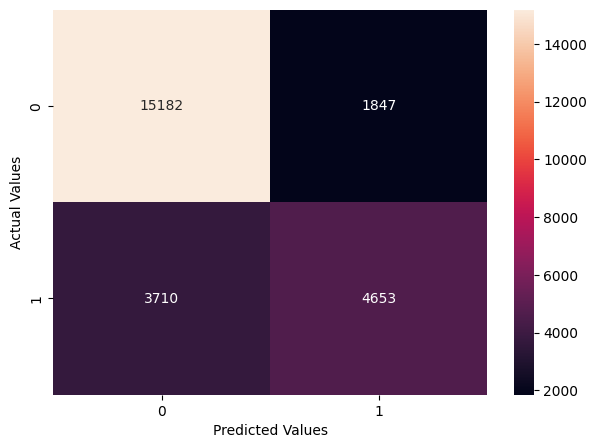

In [122]:
# another confusion matrix
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [123]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.7811515437933207


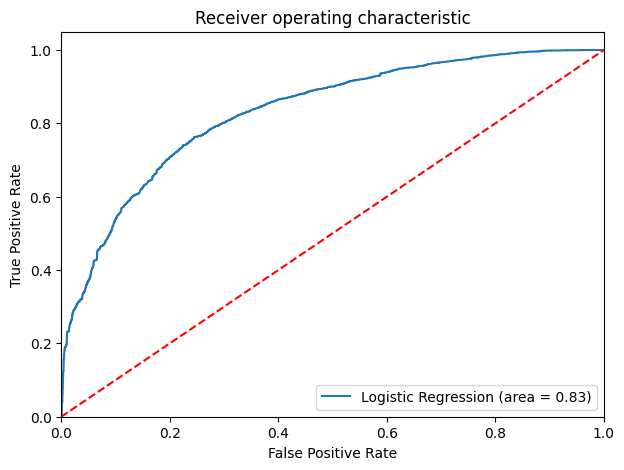

In [124]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [125]:
# dropping variables from test set as well which were dropped from training set
X_test1 = X_test.drop([ 'no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary',
                       'room_type_reserved_Room_Type 3',
                       'room_type_reserved_Room_Type 4',
                       'no_of_previous_bookings_not_canceled_log',
                       'room_type_reserved_Room_Type 2'
                      
                     ], axis=1)

In [126]:
pred_test = lg5.predict(X_test1) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7811515437933207
Accuracy on test set :  0.7846182118901038


## Building a Decision Tree model

In [127]:
tree_data = dummy_data.astype(float)

In [128]:
tree_data = tree_data.drop(['arrival_date','arrival_year','no_of_week_nights',
'no_of_weekend_nights_log'  ], axis=1)

In [129]:
X = tree_data.drop("booking_status" , axis=1)
y = tree_data.pop("booking_status")

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [131]:
# Building a decision tree using the dtclassifier function
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Yes, using a simplified data set for the tree

In [132]:
#scoring the accuracy on train & test data
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.9924385633270322
Accuracy on test set :  0.8585867867315997


In [133]:
# Checking the positive outcomes
y.sum(axis = 0)

11885.0

* the tree scores very well at accuracy, it captures most of the data.
* with 11885 prdictions of cancellation and actual of 11989 this isn't a good model.
* Since we want to avoid cancellations we will use recall to find data that will help reduce that number overall.

In [134]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [140]:
the_features = list(X.columns)
print(the_features)

['no_of_adults', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'length_stay', 'no_of_children_log', 'no_of_previous_cancellations_log', 'no_of_previous_bookings_not_canceled_log', 'no_of_special_requests_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


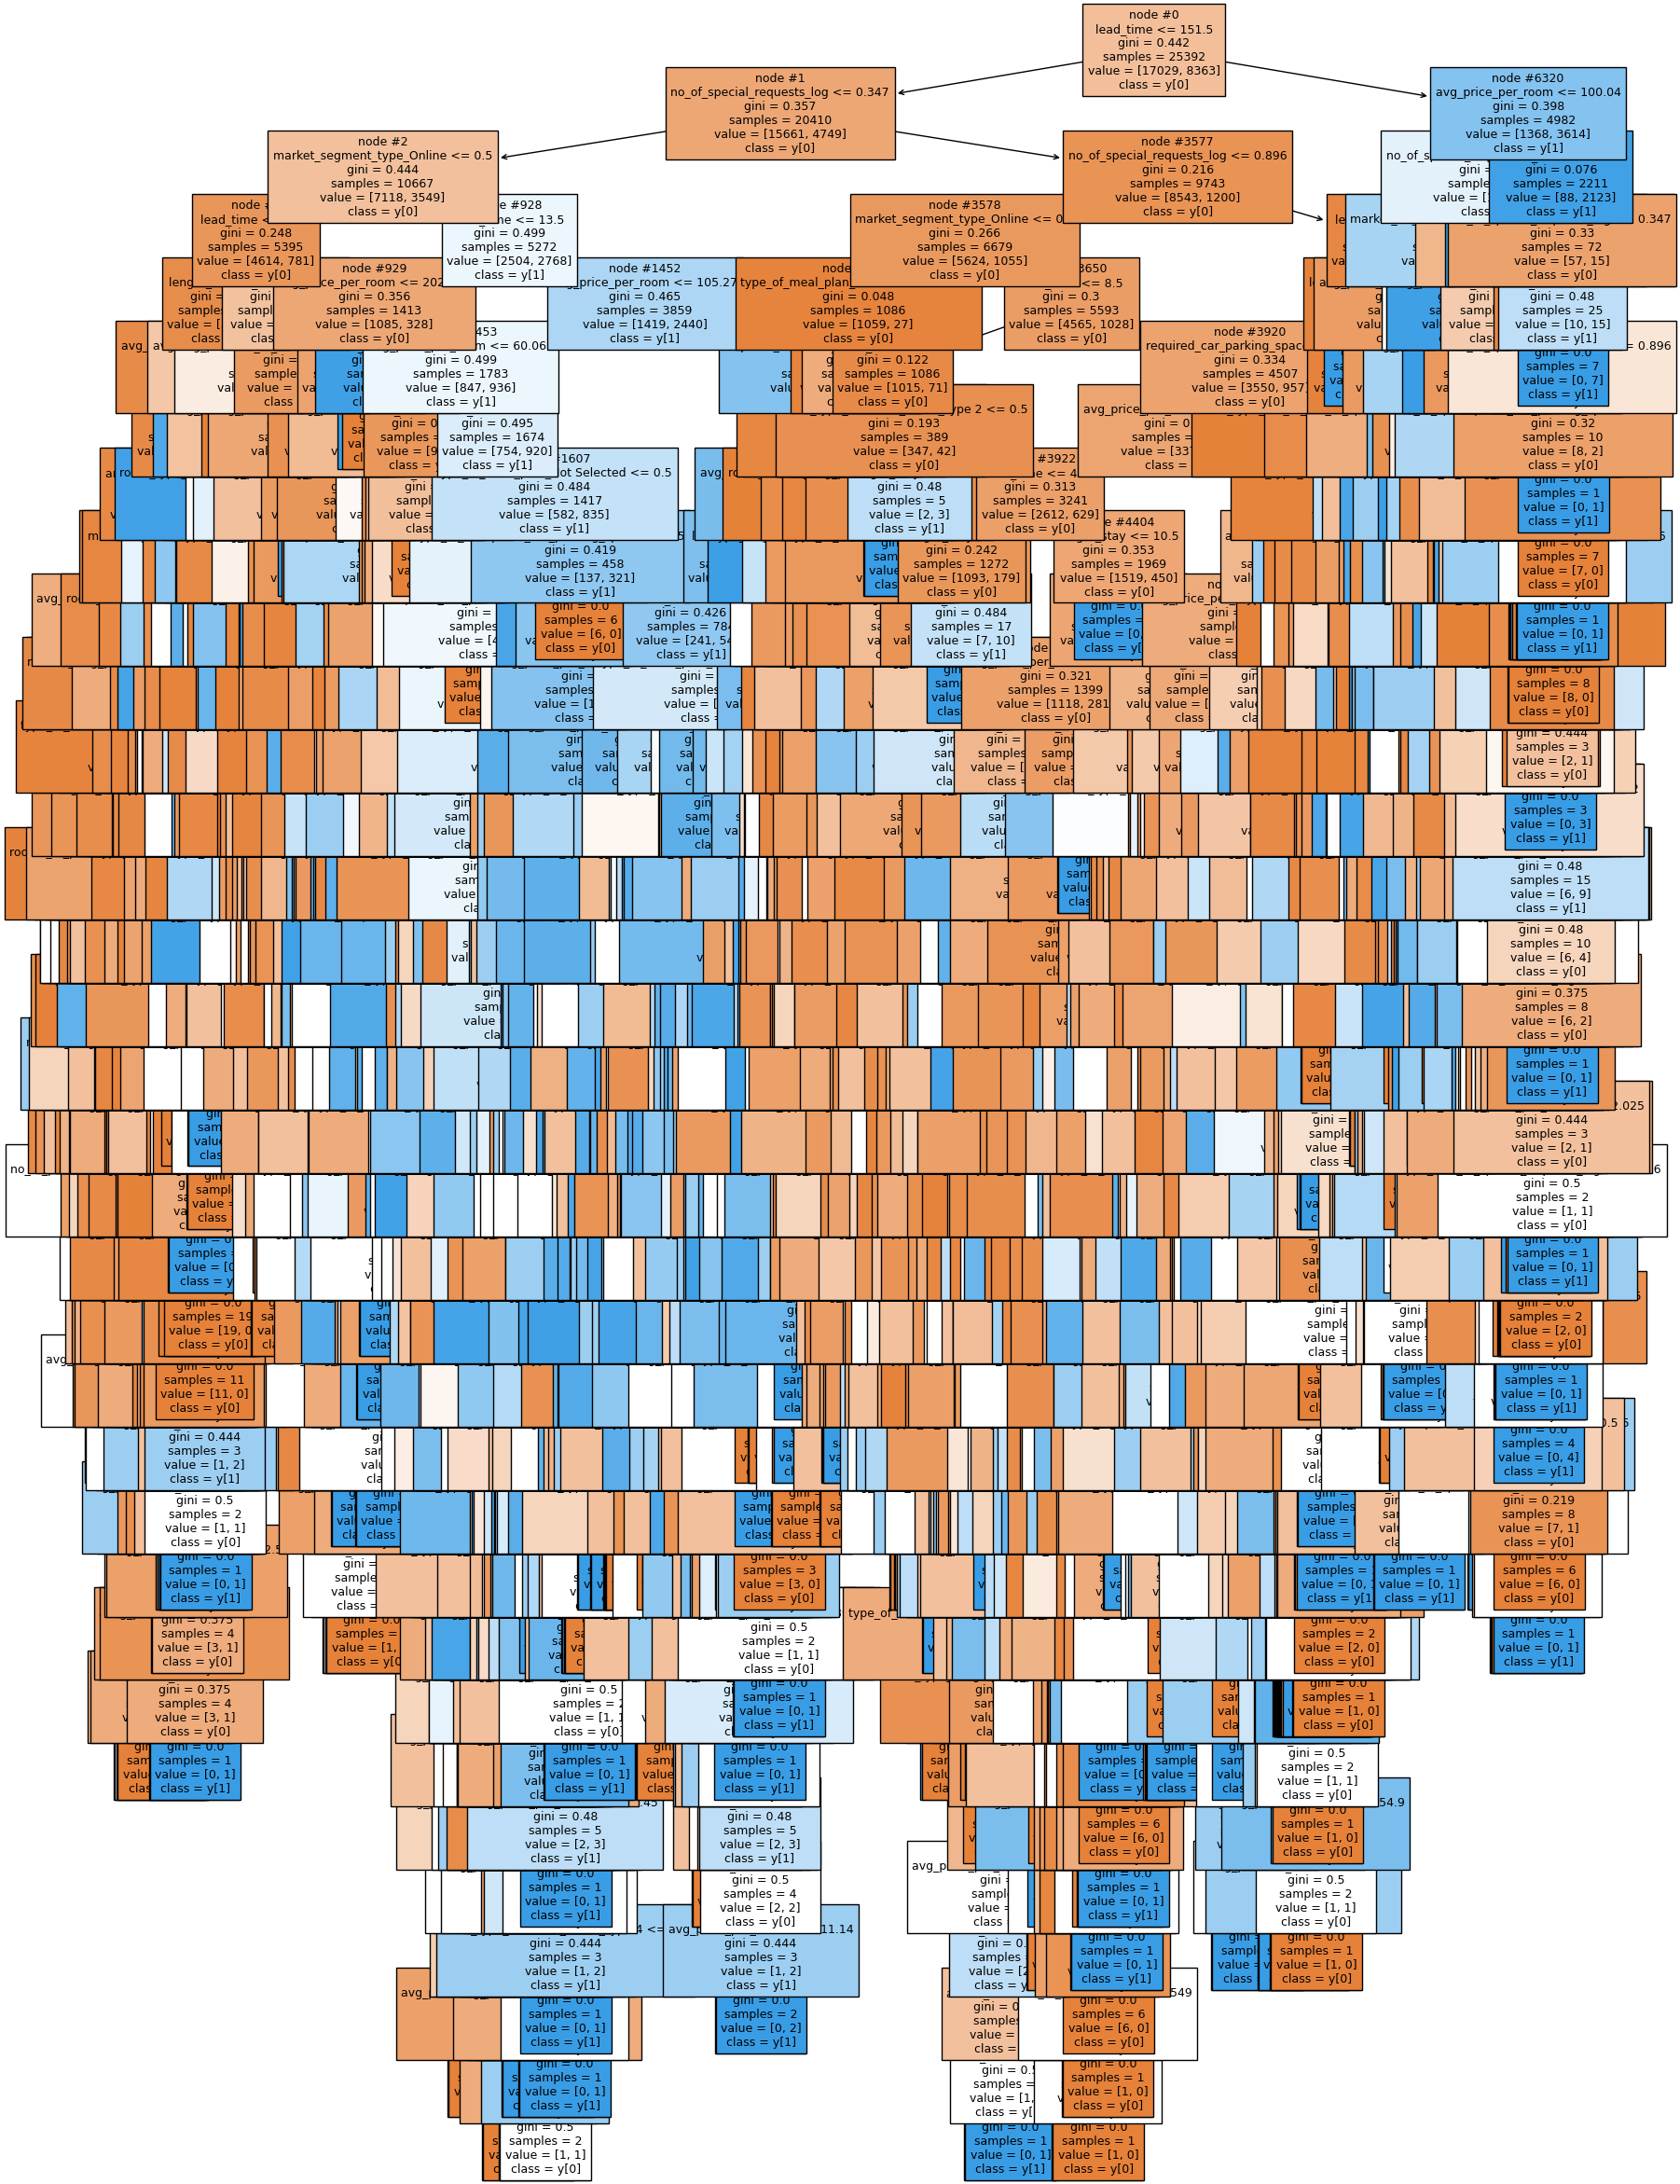

In [141]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [142]:
print(tree.export_text(dTree,feature_names=the_features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- length_stay <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_month <= 5.50
|   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 62.00
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 57.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  57.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  62.00
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 151.59
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8

In [143]:
# checking out what variables are being prioritized by the model.

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                             Imp
lead_time                                0.39708
avg_price_per_room                       0.20728
market_segment_type_Online               0.09275
arrival_month                            0.08443
length_stay                              0.07326
no_of_special_requests_log               0.06831
no_of_adults                             0.02970
type_of_meal_plan_Not Selected           0.01111
room_type_reserved_Room_Type 4           0.00820
required_car_parking_space               0.00738
no_of_children_log                       0.00590
type_of_meal_plan_Meal Plan 2            0.00456
market_segment_type_Offline              0.00352
room_type_reserved_Room_Type 2           0.00224
room_type_reserved_Room_Type 5           0.00171
room_type_reserved_Room_Type 6           0.00075
market_segment_type_Corporate            0.00069
repeated_guest                           0.00047
room_type_reserved_Room_Type 7           0.00034
no_of_previous_cance

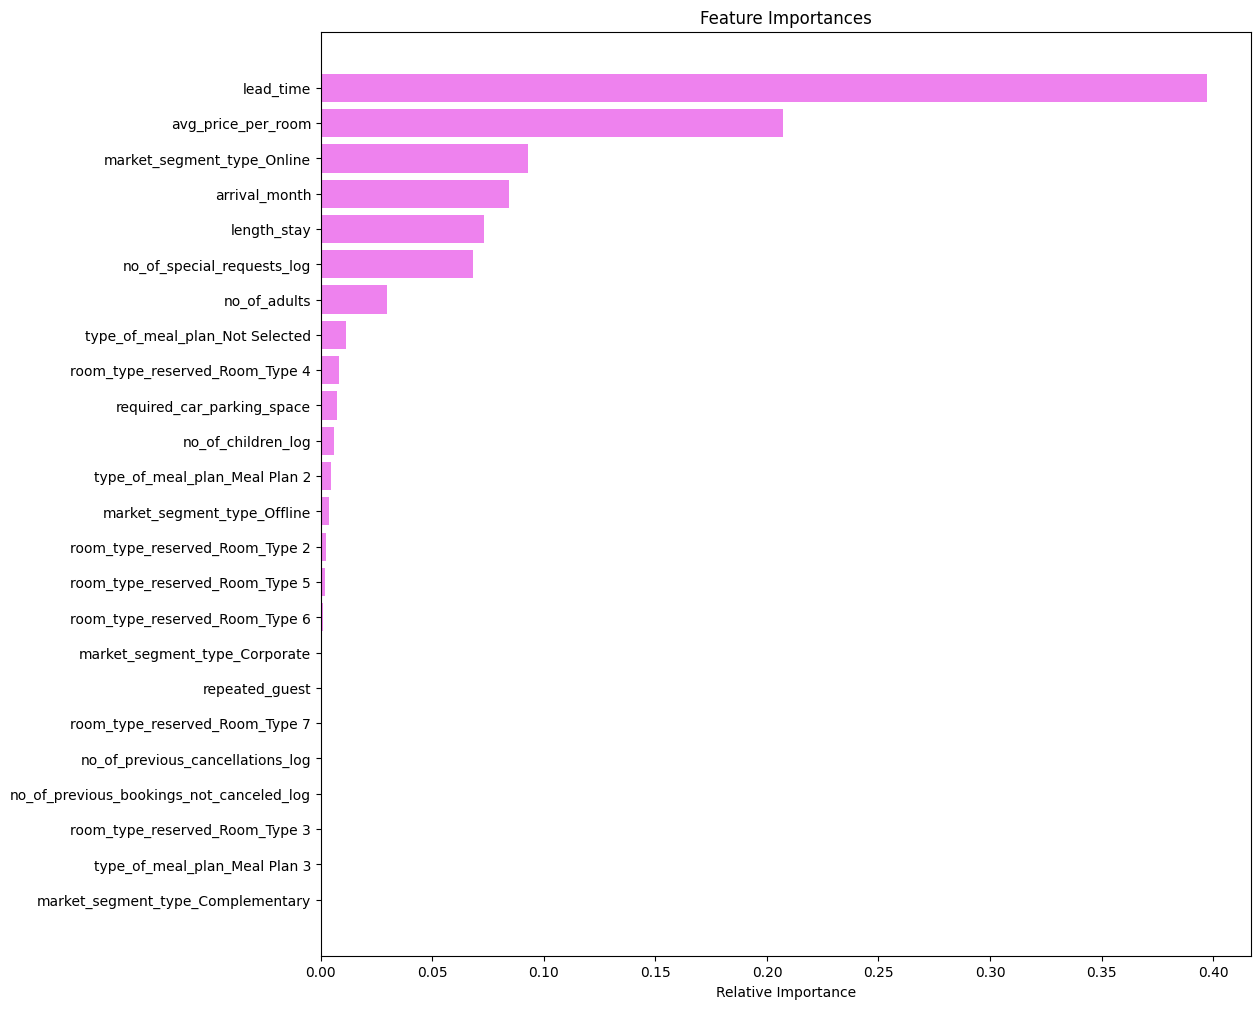

In [144]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune our Decision Tree

* Yes, prunning data

In [145]:
# Pre prune the model with max depth hyperparameter
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [149]:
# The accuracy on the pre pruned tree.
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))


Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444


* With imporved closeness in the training and testing accuracy we have successfully eliminated most of the noise from the first model (dTree)
* Having the accuracy up to 78/79% is also an improvment.
* Also very close with the recall metric, making this a much better model already than the first model.

In [150]:
# Let's see the pre pruned tree
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [151]:
print(tree.export_text(dTree1,feature_names=the_features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0.0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1.0
|   |--- no_of_special_requests_log >  0.35
|   |   |--- no_of_special_requests_log <= 0.90
|   |   |   |--- weights: [5624.00, 1055.00] class: 0.0
|   |   |--- no_of_special_requests_log >  0.90
|   |   |   |--- weights: [2919.00, 145.00] class: 0.0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests_log <= 0.35
|   |   |   |--- weights: [694.00, 1242.00] class: 1.0
|   |   |--- no_of_special_requests_log >  0.35
|   |   |   |--- weights: [586.00, 249.00] class: 0.0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [31.00, 2108.00] class: 1.0
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [57.00, 15.00] 

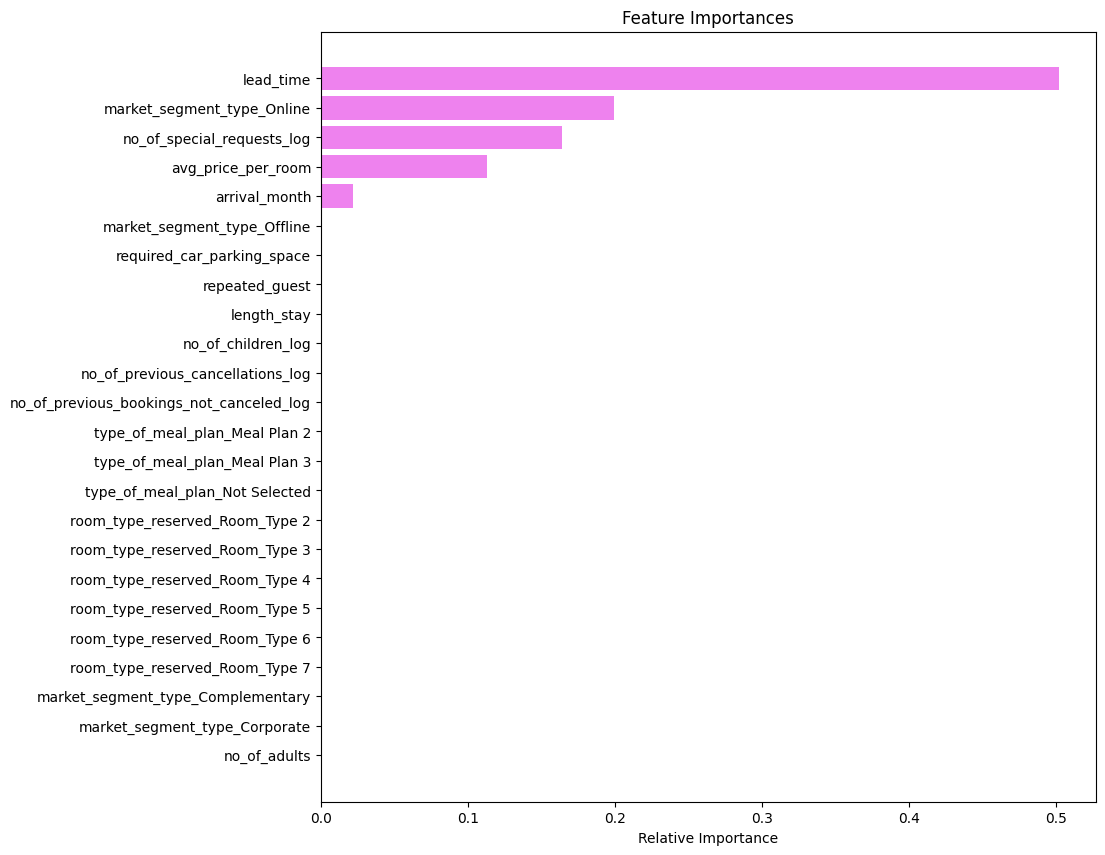

In [152]:
# Looking at the feature importances of this model
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [154]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [155]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.01030
1        0.00000     0.01030
2        0.00000     0.01030
3        0.00000     0.01030
4        0.00000     0.01030
...          ...         ...
2055     0.00890     0.32806
2056     0.00980     0.33786
2057     0.01272     0.35058
2058     0.03412     0.41882
2059     0.08118     0.50000

[2060 rows x 2 columns]

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [157]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136888


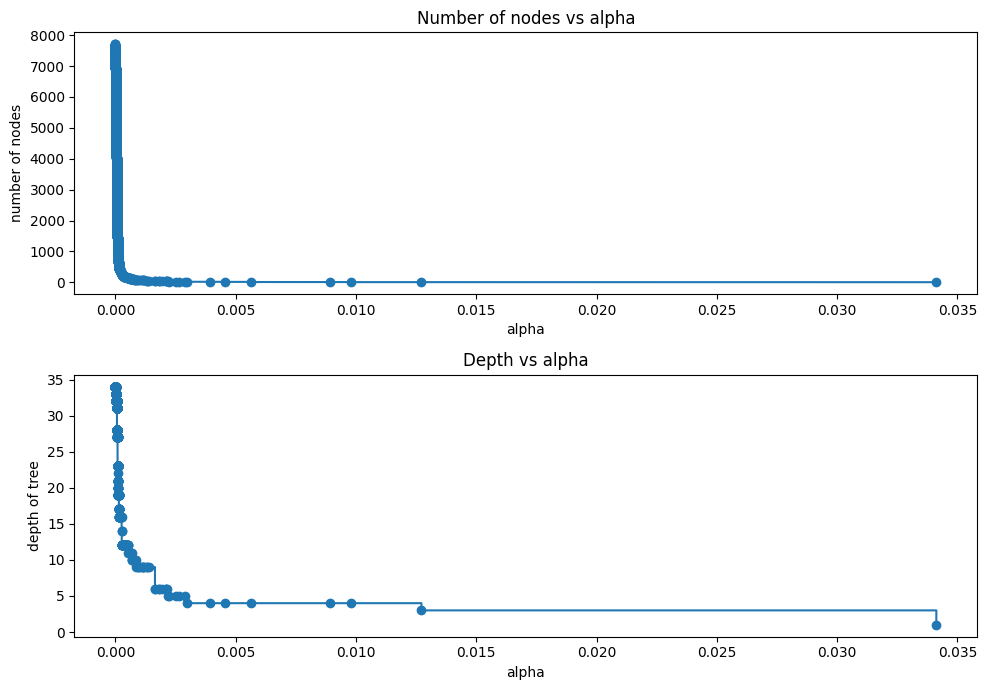

In [158]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

F1 Score vs alpha for training and testing sets

In [159]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [160]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [161]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=6.68270542106583e-05, class_weight='balanced',
                       random_state=1)


In [169]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[.981,.732,.732,.979], 'Test_Recall':[.792,.739,.739,.794]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model       0.98100      0.79200
1  Decision tree with restricted maximum depth       0.73200      0.73900
2    Decision treee with hyperparameter tuning       0.73200      0.73900
3              Decision tree with post-pruning       0.97900      0.79400

The trees with restricted maximum tuning and hyperparameter tuning performed the best while reducing overfitting. I would submit one those the model to the client.

The decision tree default was prone to overfitting, hence wy the F1 score in the training set is greater than the test set, and pre pruning fixed that overfitting. The post pruning method decision tree ended up with the highest F1 score which makes it the best choice

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

The three most important variables in terms of cancellations were the lead time, meaning how far in advance they booked the room(s), special request for the stay, and average price of the room. Rooms booked in advance of 151 days (5 months) or less were much less likely to cancel the reservation. Those who made a special request on top of that were very unlikely to cancel. This I believe is an opportunity. Rooms booked over 151 days were more likely to cancel. Price was the determining factor for those cancellations. As the likelihood of a cancelation was increased if the room was priced over 100.04 Euros. Leading me to believe that booked early and then subsequently found a better deal.

My Recommendations

* Create brand loyaly among repeating customers such as reward cards and complementary breakfasts in order to maintain it
* Offer your best room rates before 5 months ahead. After that you may be able to increase your prices slightly and increase profit.
* To reduce the the possibility of cancellation, you can create a marketing campaign that allows a drawing for a free room or free stay
* Require a nonrefundable deposit on all rooms in advance of over 5 months.
* Add some VIP perks
* Offer Room upgrade specials
* Look at strong and fast WiFi services
